

installing library

In [330]:

pip install missingno

In [368]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import missingno as msno

# data understanding
Going through provided data found that loan data provided from july 2007 to dec 2011.

### Catgrising data variables 
#### General Understanidng
 Here we categrised data in three types- 
 1) demographical varables - These which are related to applicants(borrower).
 In current data following are the demographical variables-
   addr_state, annual_inc, desc, emp_length, emp_title,  home_ownership,  purpose, title, url,  verification_status, zip_code,  
 2) loan charactristic variable -  
 loan_amnt,funded_amnt,funded_amnt_inv,int_rate,loan_status,grade,sub_grade,dti,loan_issue_d,term,installment
 3) Customer behavior variables - those which are generated after the loan is approved.
   delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type
 
 Note- Customer Behavior varables data not availabel at time of loan application. so we not consindring these varables during data analysis.

Reading .csv file using pandas library 

In [369]:
# loading data
main_csv = pd.read_csv('loan.csv',encoding = "ISO-8859-1", low_memory=False)


In [370]:
#setting display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

C:\Users\admin\AppData\Local\Temp\ipykernel_10616\1248964652.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


cheking csv file datatype and shape 

In [371]:
main_csv.head(5)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501  1296599    5000       5000         4975.0            36 months   
1  1077430  1314167    2500       2500         2500.0            60 months   
2  1077175  1313524    2400       2400         2400.0            36 months   
3  1076863  1277178    10000      10000        10000.0           36 months   
4  1075358  1311748    3000       3000         3000.0            60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0  10.65%   162.87       B     B2        NaN                       10+ years   
1  15.27%   59.83        C     C4        Ryder                     < 1 year    
2  15.96%   84.33        C     C5        NaN                       10+ years   
3  13.49%   339.31       C     C1        AIR RESOURCES BOARD       10+ years   
4  12.69%   67.79        B     B5        University Medical Group  1 year      

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0  RENT           24000.0     Verified            Dec-11  Fully Paid    
1  RENT           30000.0     Source Verified     Dec-11  Charged Off   
2  RENT           12252.0     Not Verified        Dec-11  Fully Paid    
3  RENT           49200.0     Source Verified     Dec-11  Fully Paid    
4  RENT           80000.0     Source Verified     Dec-11  Current       

  pymnt_plan  \
0  n           
1  n           
2  n           
3  n           
4  n           

                                                                url  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430   
2  https://lendingclub.com/browse/loanDetail.action?loan_id=1077175   
3  https://lendingclub.com/browse/loanDetail.action?loan_id=1076863   
4  https://lendingclub.com/browse/loanDetail.action?loan_id=1075358   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             desc  \
0    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
1    Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>   
2  NaN                                                                                                                                                                                                                                                                                                          

In [372]:
print(main_csv.shape)


(39717, 111)


In [373]:
main_csv.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05  7456.670694   7187.238670    
min    5.473400e+04  7.069900e+04  500.000000    500.000000     
25%    5.162210e+05  6.667800e+05  5500.000000   5400.000000    
50%    6.656650e+05  8.508120e+05  10000.000000  9600.000000    
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count  39717.000000     39717.000000  3.971700e+04  39717.000000   
mean   10397.448868     324.561922    6.896893e+04  13.315130      
std    7128.450439      208.874874    6.379377e+04  6.678594       
min    0.000000         15.690000     4.000000e+03  0.000000       
25%    5000.000000      167.020000    4.040400e+04  8.170000       
50%    8975.000000      280.220000    5.900000e+04  13.400000      
75%    14400.000000     430.780000    8.230000e+04  18.600000      
max    35000.000000     1305.190000   6.000000e+06  29.990000      

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  39717.000000  39717.000000    14035.000000             
mean   0.146512      0.869200        35.900962                
std    0.491812      1.070219        22.020060                
min    0.000000      0.000000        0.000000                 
25%    0.000000      0.000000        18.000000                
50%    0.000000      1.000000        34.000000                
75%    0.000000      1.000000        52.000000                
max    11.000000     8.000000        120.000000               

       mths_since_last_record      open_acc       pub_rec      revol_bal  \
count  2786.000000             39717.000000  39717.000000  39717.000000    
mean   69.698134               9.294408      0.055065      13382.528086    
std    43.822529               4.400282      0.237200      15885.016641    
min    0.000000                2.000000      0.000000      0.000000        
25%    22.000000               6.000000      0.000000      3703.000000     
50%    90.000000               9.000000      0.000000      8850.000000     
75%    104.000000              12.000000     0.000000      17058.000000    
max    129.000000              44.000000     4.000000      149588.000000   

          total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  39717.000000  39717.000000  39717.000000   39717.000000   
mean   22.088828     51.227887     50.989768      12153.596544   
std    11.401709     375.172839    373.824457     9042.040766    
min    2.000000      0.000000      0.000000       0.000000       
25%    13.000000     0.000000      0.000000       5576.930000    
50%    20.000000     0.000000      0.000000       9899.640319    
75%    29.000000     0.000000      0.000000       16534.433040   
max    90.000000     6311.470000   6307.370000    58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count  39717.000000     39717.000000     39717.000000   39717.000000         
mean   11567.149118     9793.348813      2263.663172    1.363015             
std    8942.672613      7065.522127      2608.111964    7.289979             
min    0.000000         0.000000         0.000000       0.000000             
25%    5112.310000      4600.000000      662.180000     0.000000             
50%    9287.150000      8000.000000      1348.910000    0.000000             
75%    15798.810000     13653.260000     2833.400000    0.000000             
max    58563.680000     35000.020000     23563.680000   180.200000           

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  39717.000000  39717.000000             39717.000000      
mean   95.221624     12.406112                2678.826162       
std    688.744771    148.671593               4447.136012       
min    

In [374]:
# checking data types
daypes= main_csv.dtypes
daypes

id                                int64  
member_id                         int64  
loan_amnt                         int64  
funded_amnt                       int64  
funded_amnt_inv                   float64
term                              object 
int_rate                          object 
installment                       float64
grade                             object 
sub_grade                         object 
emp_title                         object 
emp_length                        object 
home_ownership                    object 
annual_inc                        float64
verification_status               object 
issue_d                           object 
loan_status                       object 
pymnt_plan                        object 
url                               object 
desc                              object 
purpose                           object 
title                             object 
zip_code                          object 
addr_state                        

In [375]:

main_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# DATA Celaning

<AxesSubplot:>

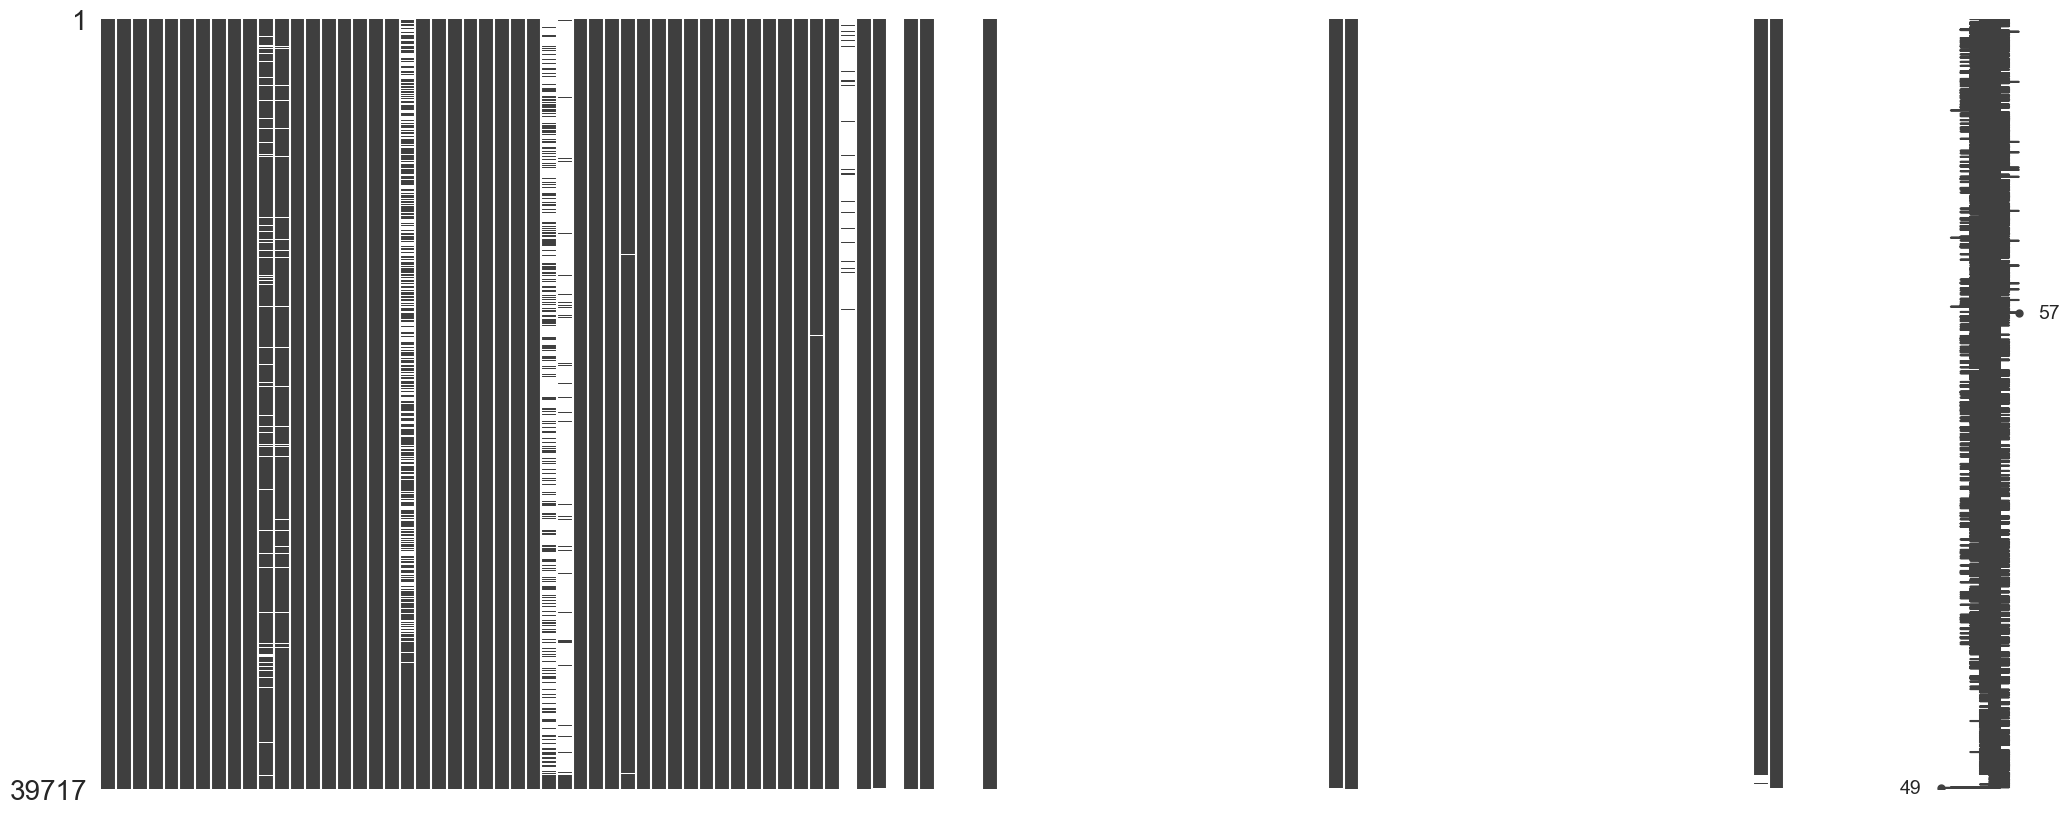

In [376]:
# Visualize missing values as a matrix Before removing Missing values columns
msno.matrix(main_csv)

<AxesSubplot:>

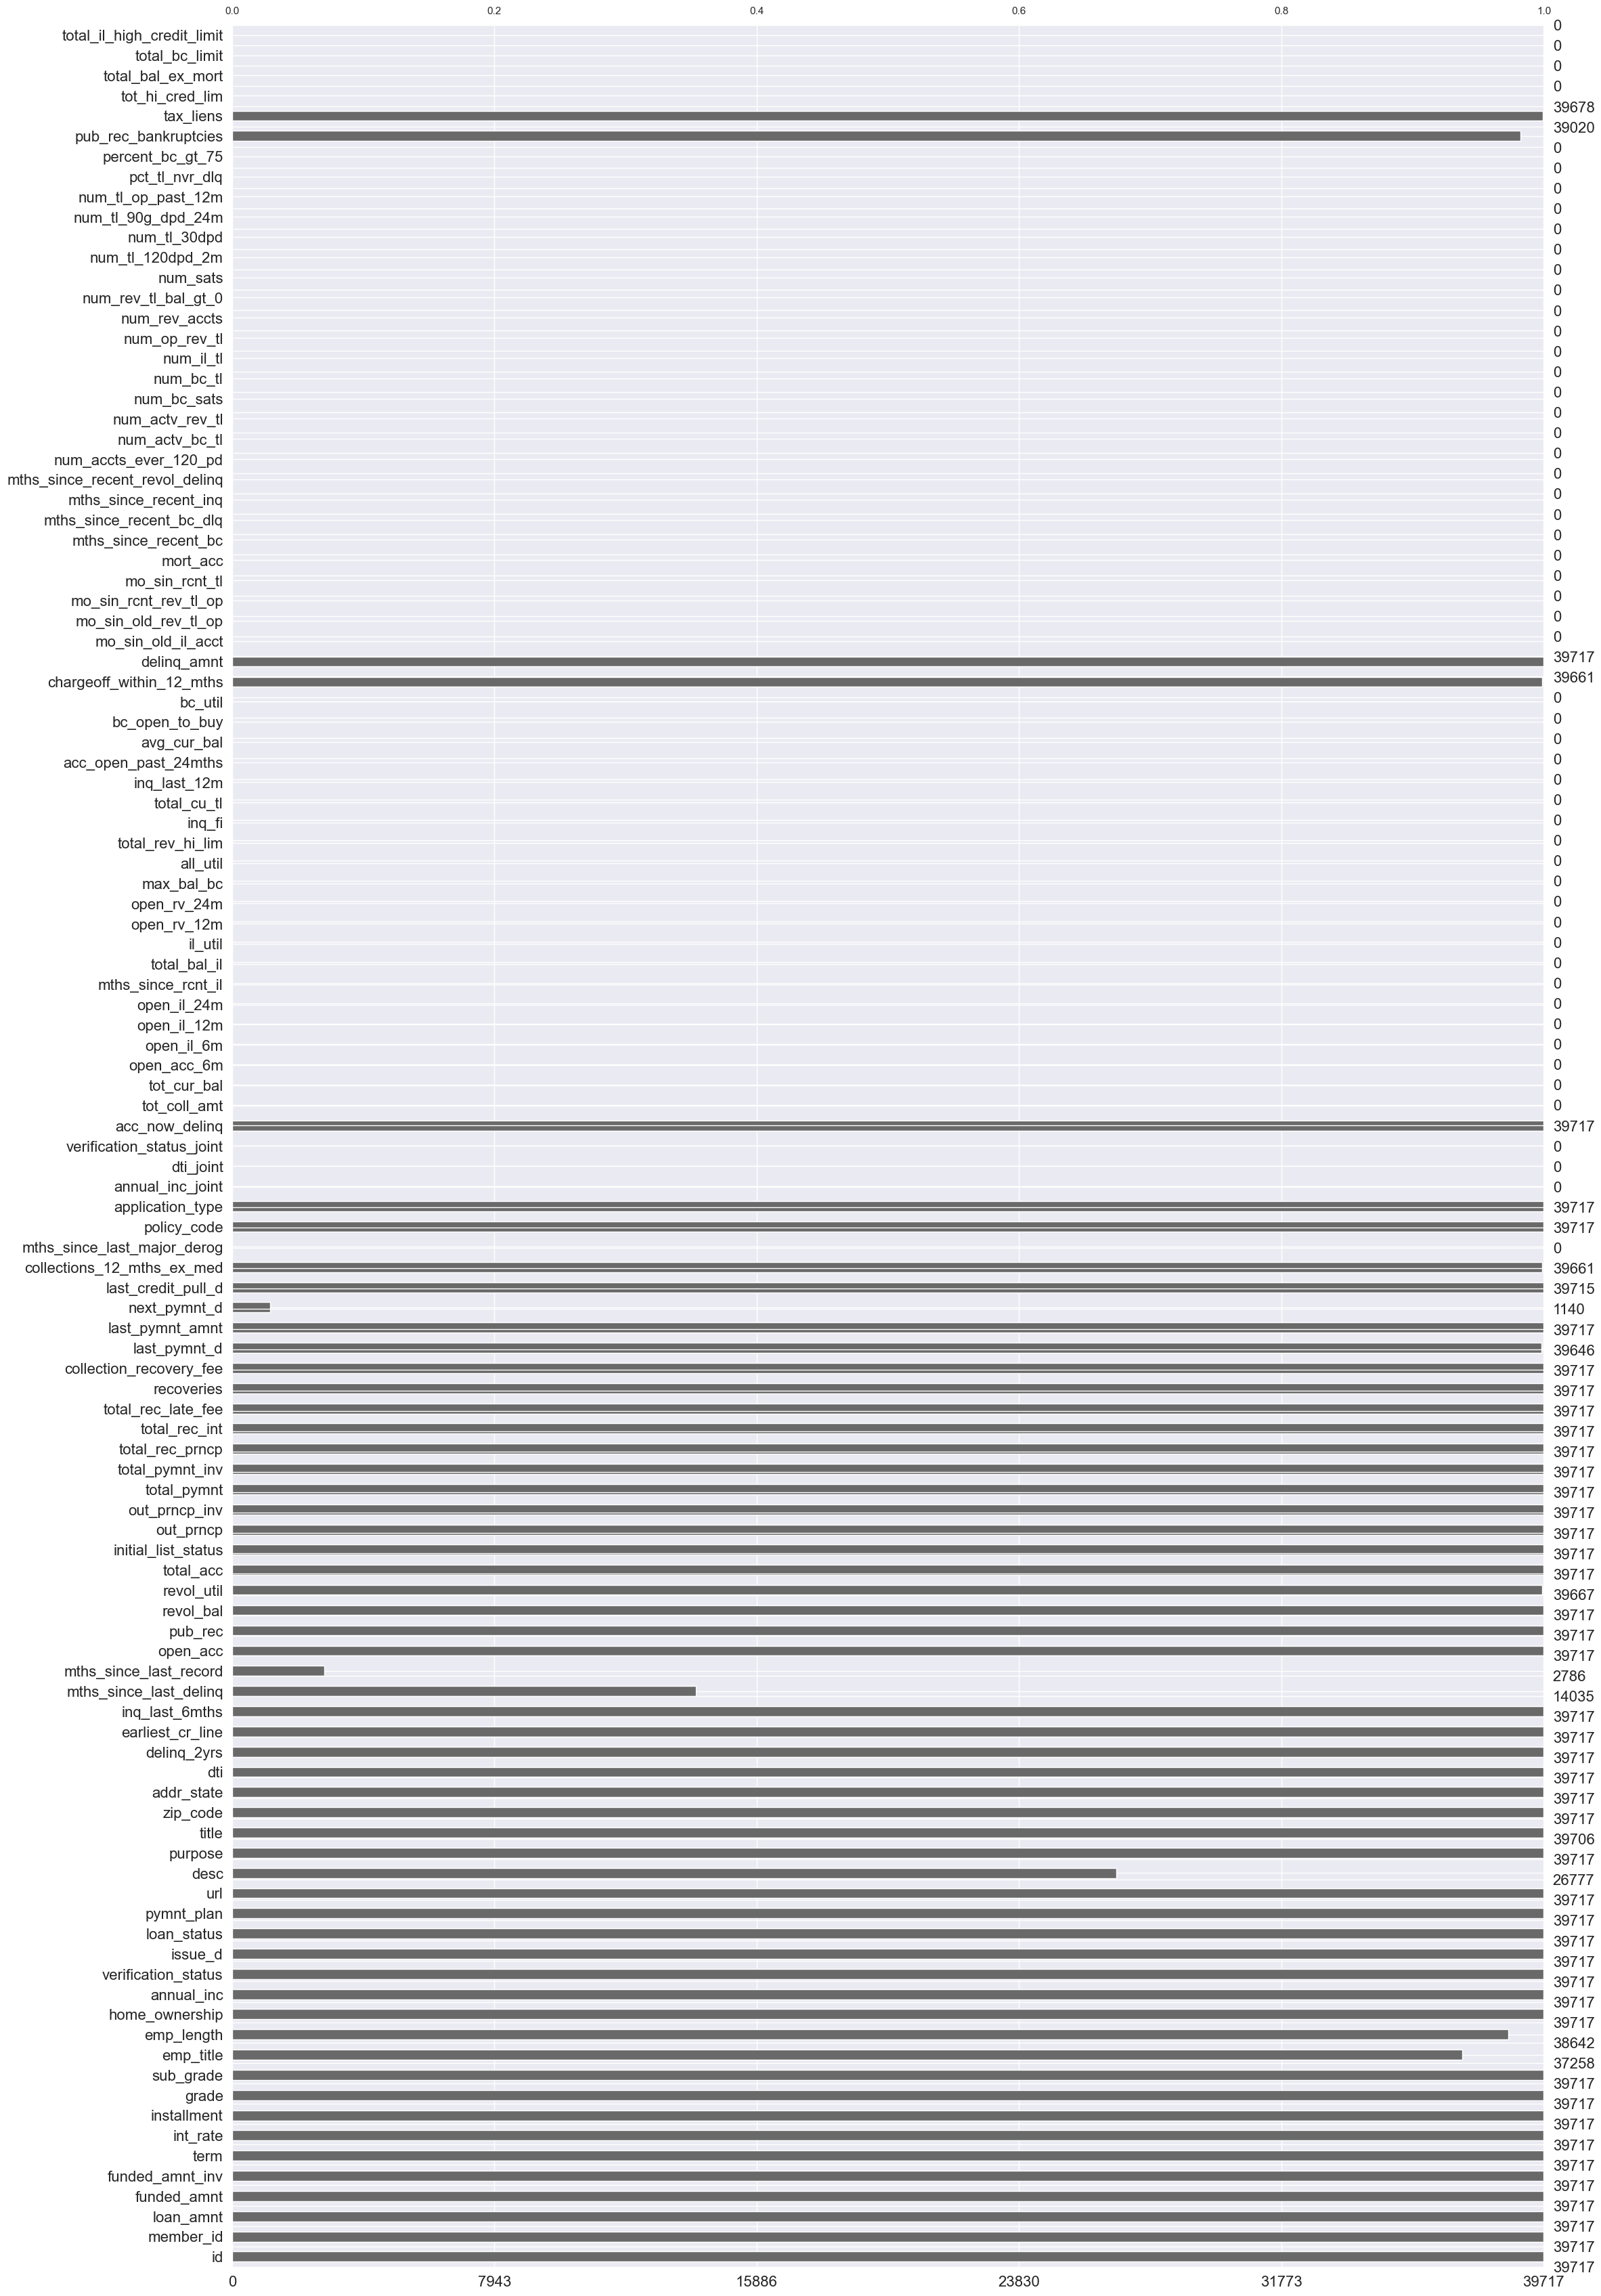

In [377]:
msno.bar(main_csv)

<AxesSubplot:>

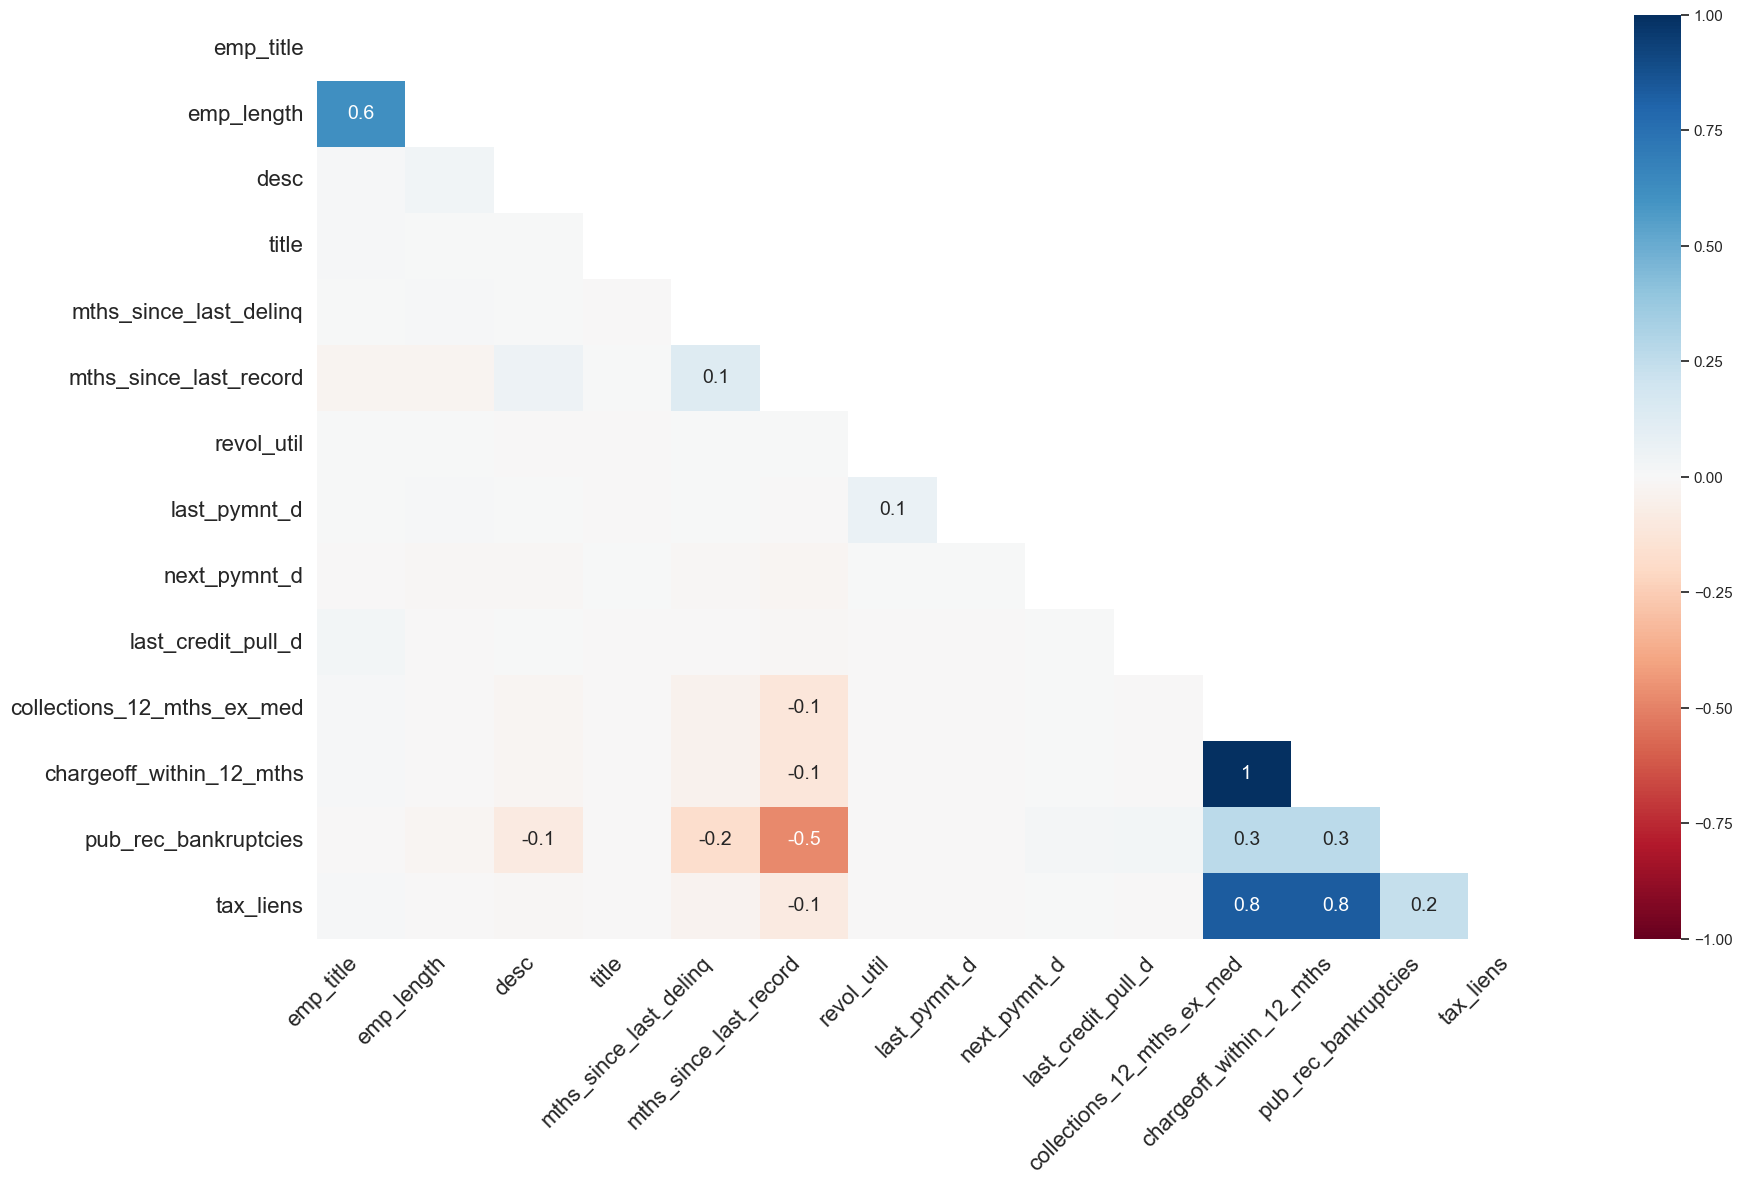

In [378]:
# Visualize the correlation between the number of
# missing values in different columns as a heatmap
msno.heatmap(main_csv)

In [379]:
# Drop columns not useful for analysis (Customer behavior variables)

main_csv = main_csv.drop(['delinq_2yrs', 'inq_last_6mths', 'open_acc','pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
                  'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
                  'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d','collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens','id', 'member_id',
                                 'url', 'desc', 'zip_code','pub_rec_bankruptcies','earliest_cr_line'
                 ], axis = 1)

In [380]:
main_csv.shape


(39717, 82)

In [381]:
#checking empty columns in %age
round((100*main_csv.isnull().sum())/len(main_csv.index))

loan_amnt                         0.0  
funded_amnt                       0.0  
funded_amnt_inv                   0.0  
term                              0.0  
int_rate                          0.0  
installment                       0.0  
grade                             0.0  
sub_grade                         0.0  
emp_title                         6.0  
emp_length                        3.0  
home_ownership                    0.0  
annual_inc                        0.0  
verification_status               0.0  
issue_d                           0.0  
loan_status                       0.0  
pymnt_plan                        0.0  
purpose                           0.0  
title                             0.0  
addr_state                        0.0  
dti                               0.0  
mths_since_last_delinq            65.0 
mths_since_last_record            93.0 
initial_list_status               0.0  
next_pymnt_d                      97.0 
mths_since_last_major_derog       100.0


In [382]:
#drop all the columns which contains more then 55 % missing Data 
missing_values_colms = main_csv.columns[100*(main_csv.isnull().sum()/len(main_csv.index)) > 55]
print(missing_values_colms)
main_csv=main_csv.drop(missing_values_colms,axis=1)

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [383]:
main_csv.shape

(39717, 25)

<AxesSubplot:>

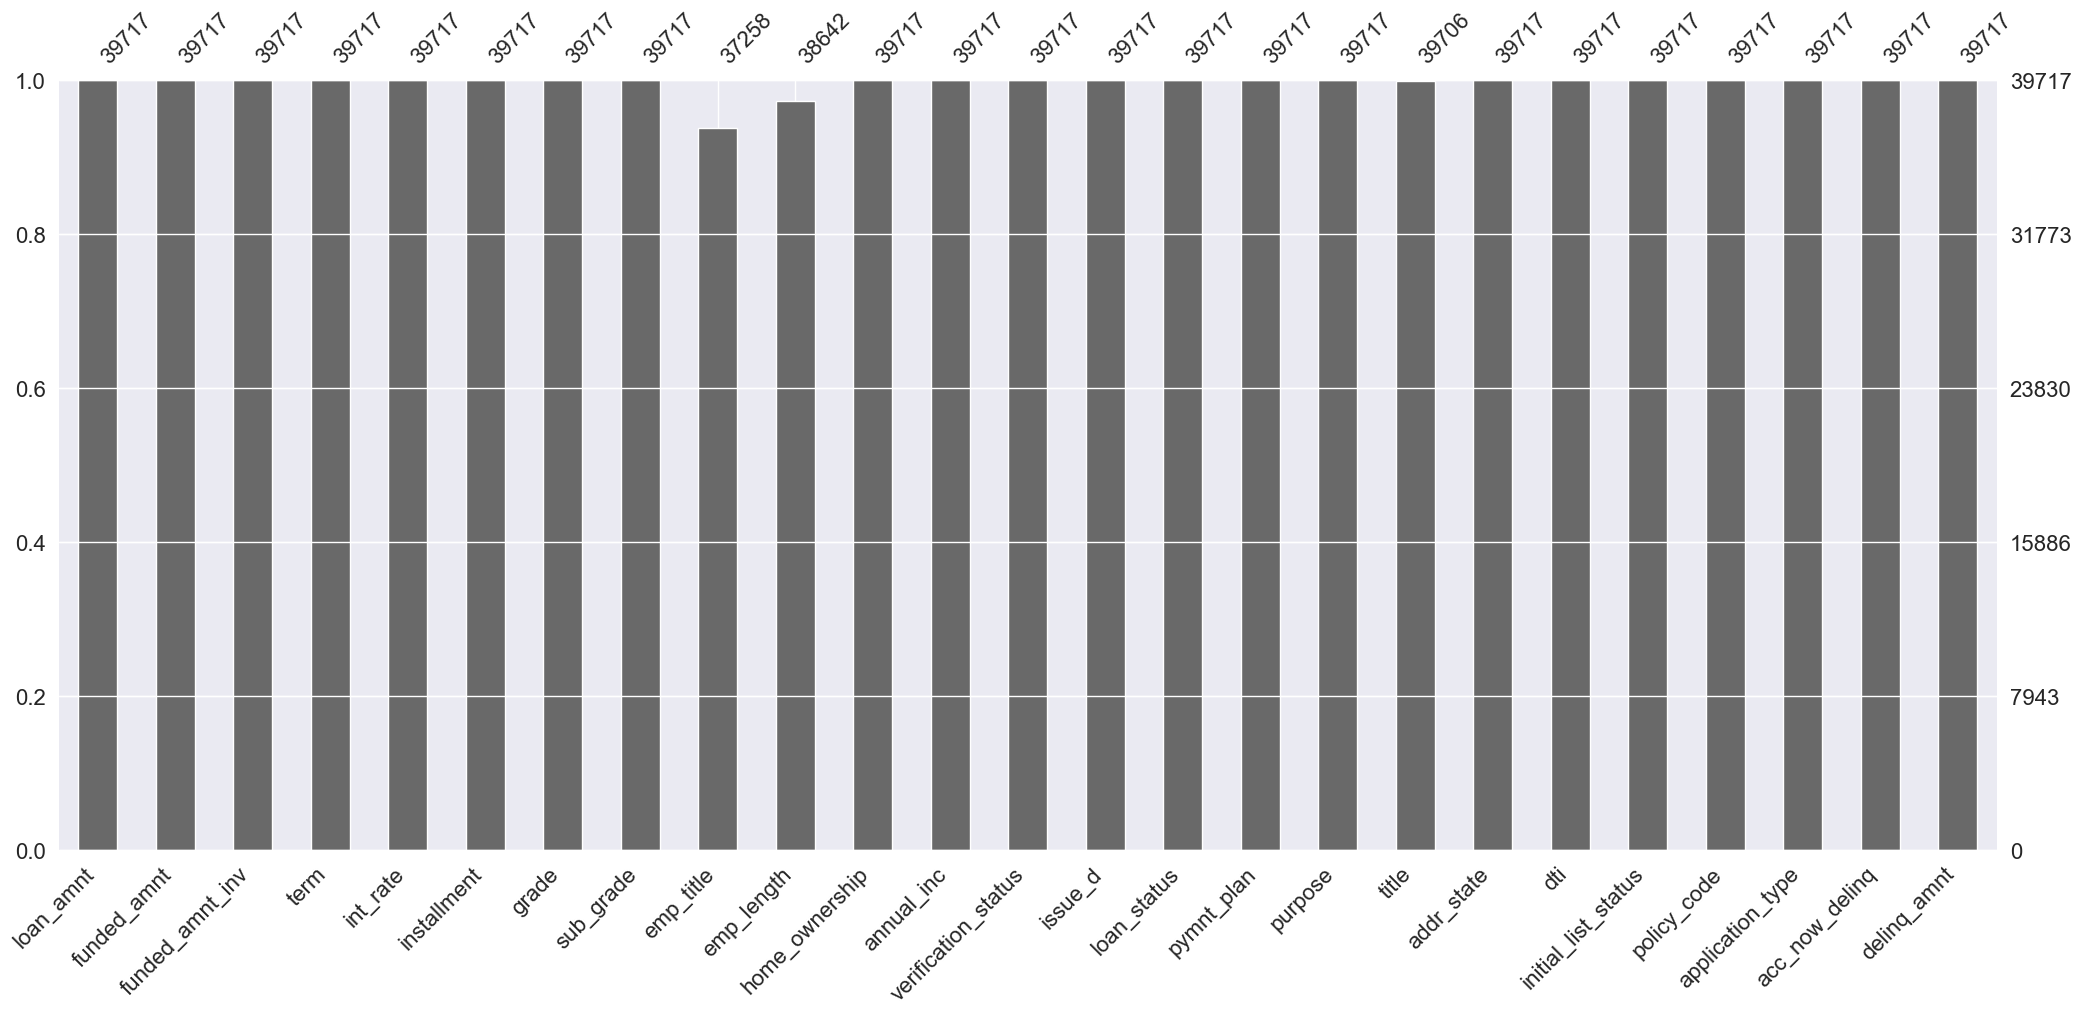

In [384]:
# bar plot after rmoving missing values
msno.bar(main_csv)

Insights -
In bar Graph we able to seen that all empty value columns are removed only two columns is persent there didn't have 100% value.1) emp_title 2) emp_length

<AxesSubplot:>

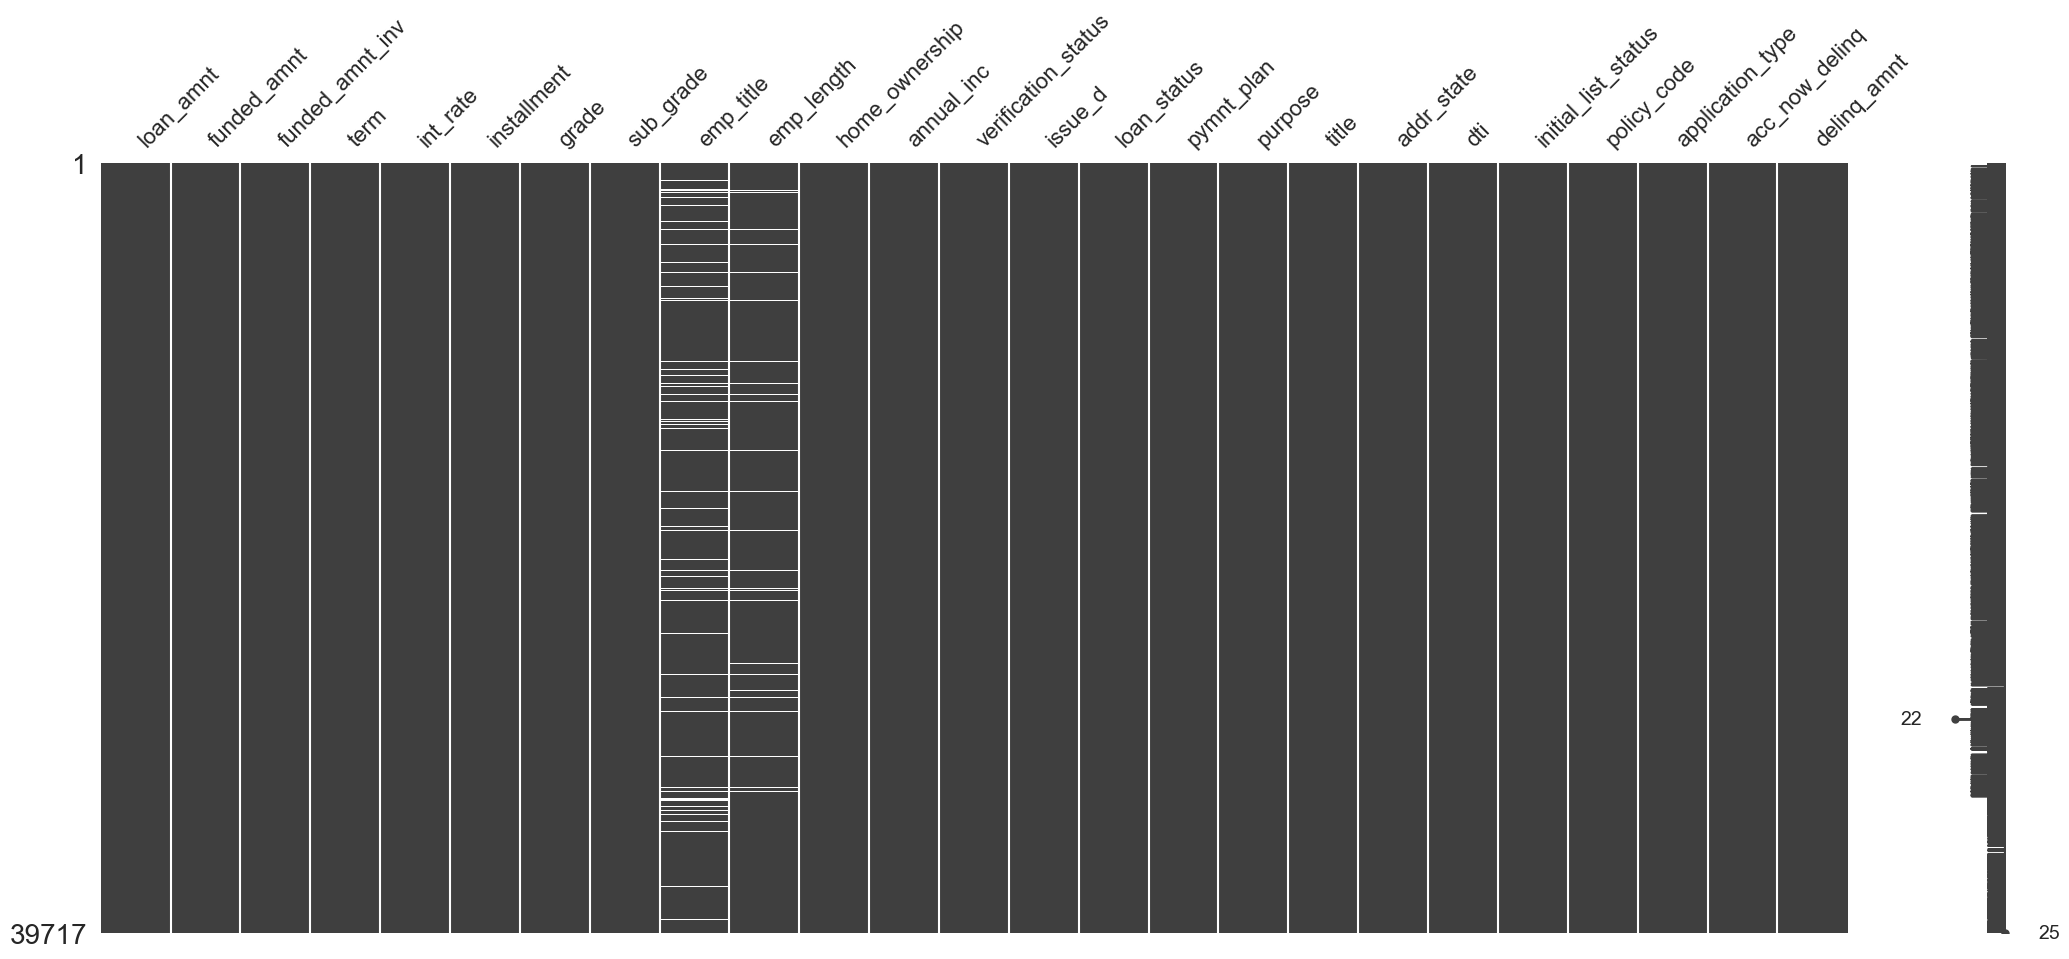

In [385]:
msno.matrix(main_csv)

In [386]:
#Rechecking empty columns in %age
round((100*main_csv.isnull().sum())/len(main_csv.index)) 

loan_amnt              0.0
funded_amnt            0.0
funded_amnt_inv        0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_title              6.0
emp_length             3.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
pymnt_plan             0.0
purpose                0.0
title                  0.0
addr_state             0.0
dti                    0.0
initial_list_status    0.0
policy_code            0.0
application_type       0.0
acc_now_delinq         0.0
delinq_amnt            0.0
dtype: float64

same results we got here which one we got from upper bar graph

In [387]:
#again analysing the data
main_csv.head(20)

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0   5000       5000         4975.0            36 months  10.65%   162.87        
1   2500       2500         2500.0            60 months  15.27%   59.83         
2   2400       2400         2400.0            36 months  15.96%   84.33         
3   10000      10000        10000.0           36 months  13.49%   339.31        
4   3000       3000         3000.0            60 months  12.69%   67.79         
5   5000       5000         5000.0            36 months  7.90%    156.46        
6   7000       7000         7000.0            60 months  15.96%   170.08        
7   3000       3000         3000.0            36 months  18.64%   109.43        
8   5600       5600         5600.0            60 months  21.28%   152.39        
9   5375       5375         5350.0            60 months  12.69%   121.45        
10  6500       6500         6500.0            60 months  14.65%   153.45        
11  12000      12000        12000.0           36 months  12.69%   402.54        
12  9000       9000         9000.0            36 months  13.49%   305.38        
13  3000       3000         3000.0            36 months  9.91%    96.68         
14  10000      10000        10000.0           36 months  10.65%   325.74        
15  1000       1000         1000.0            36 months  16.29%   35.31         
16  10000      10000        10000.0           36 months  15.27%   347.98        
17  3600       3600         3600.0            36 months  6.03%    109.57        
18  6000       6000         6000.0            36 months  11.71%   198.46        
19  9200       9200         9200.0            36 months  6.03%    280.01        

   grade sub_grade                            emp_title emp_length  \
0   B     B2        NaN                                  10+ years   
1   C     C4        Ryder                                < 1 year    
2   C     C5        NaN                                  10+ years   
3   C     C1        AIR RESOURCES BOARD                  10+ years   
4   B     B5        University Medical Group             1 year      
5   A     A4        Veolia Transportaton                 3 years     
6   C     C5        Southern Star Photography            8 years     
7   E     E1        MKC Accounting                       9 years     
8   F     F2        NaN                                  4 years     
9   B     B5        Starbucks                            < 1 year    
10  C     C3        Southwest Rural metro                5 years     
11  B     B5        UCLA                                 10+ years   
12  C     C1        Va. Dept of Conservation/Recreation  < 1 year    
13  B     B1        Target                               3 years     
14  B     B2        SFMTA                                3 years     
15  D     D1        Internal revenue Service             < 1 year    
16  C     C4        Chin's Restaurant                    4 years     
17  A     A1        Duracell                             10+ years   
18  B     B3        Connection Inspection                1 year      
19  A     A1        Network Interpreting Service         6 years     

   home_ownership  annual_inc verification_status issue_d  loan_status  \
0   RENT           24000.00    Verified            Dec-11  Fully Paid    
1   RENT           30000.00    Source Verified     Dec-11  Charged Off   
2   RENT           12252.00    Not Verified        Dec-11  Fully Paid    
3   RENT           49200.00    Source Verified     Dec-11  Fully Paid    
4   RENT           80000.00    Source Verified     Dec-11  Current       
5   RENT           36000.00    Source Verified     Dec-11  Fully Paid    
6   RENT           47004.00    Not Verified        Dec-11  Fully Paid    
7   RENT           48000.00    Source Verified     Dec-11  Fully Paid    
8   OWN            40000.00    Source Verified     Dec-11  Charged Off   
9   RENT           15000.00    Verified            Dec-11  Charged Off   
10  OWN          

From looking again data we found that still some coulmn is persent which have only 1 unique values so going to removing these  columns becuase these columns not helping to making decision .

In [388]:
main_csv.nunique()

loan_amnt              885  
funded_amnt            1041 
funded_amnt_inv        8205 
term                   2    
int_rate               371  
installment            15383
grade                  7    
sub_grade              35   
emp_title              28820
emp_length             11   
home_ownership         5    
annual_inc             5318 
verification_status    3    
issue_d                55   
loan_status            3    
pymnt_plan             1    
purpose                14   
title                  19615
addr_state             50   
dti                    2868 
initial_list_status    1    
policy_code            1    
application_type       1    
acc_now_delinq         1    
delinq_amnt            1    
dtype: int64

In [389]:
main_csv=main_csv = main_csv.drop(['delinq_amnt','acc_now_delinq','application_type','policy_code','initial_list_status','pymnt_plan'], axis = 1)

In [390]:
main_csv.shape

(39717, 19)

In [391]:
main_csv.head(20)

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0   5000       5000         4975.0            36 months  10.65%   162.87        
1   2500       2500         2500.0            60 months  15.27%   59.83         
2   2400       2400         2400.0            36 months  15.96%   84.33         
3   10000      10000        10000.0           36 months  13.49%   339.31        
4   3000       3000         3000.0            60 months  12.69%   67.79         
5   5000       5000         5000.0            36 months  7.90%    156.46        
6   7000       7000         7000.0            60 months  15.96%   170.08        
7   3000       3000         3000.0            36 months  18.64%   109.43        
8   5600       5600         5600.0            60 months  21.28%   152.39        
9   5375       5375         5350.0            60 months  12.69%   121.45        
10  6500       6500         6500.0            60 months  14.65%   153.45        
11  12000      12000        12000.0           36 months  12.69%   402.54        
12  9000       9000         9000.0            36 months  13.49%   305.38        
13  3000       3000         3000.0            36 months  9.91%    96.68         
14  10000      10000        10000.0           36 months  10.65%   325.74        
15  1000       1000         1000.0            36 months  16.29%   35.31         
16  10000      10000        10000.0           36 months  15.27%   347.98        
17  3600       3600         3600.0            36 months  6.03%    109.57        
18  6000       6000         6000.0            36 months  11.71%   198.46        
19  9200       9200         9200.0            36 months  6.03%    280.01        

   grade sub_grade                            emp_title emp_length  \
0   B     B2        NaN                                  10+ years   
1   C     C4        Ryder                                < 1 year    
2   C     C5        NaN                                  10+ years   
3   C     C1        AIR RESOURCES BOARD                  10+ years   
4   B     B5        University Medical Group             1 year      
5   A     A4        Veolia Transportaton                 3 years     
6   C     C5        Southern Star Photography            8 years     
7   E     E1        MKC Accounting                       9 years     
8   F     F2        NaN                                  4 years     
9   B     B5        Starbucks                            < 1 year    
10  C     C3        Southwest Rural metro                5 years     
11  B     B5        UCLA                                 10+ years   
12  C     C1        Va. Dept of Conservation/Recreation  < 1 year    
13  B     B1        Target                               3 years     
14  B     B2        SFMTA                                3 years     
15  D     D1        Internal revenue Service             < 1 year    
16  C     C4        Chin's Restaurant                    4 years     
17  A     A1        Duracell                             10+ years   
18  B     B3        Connection Inspection                1 year      
19  A     A1        Network Interpreting Service         6 years     

   home_ownership  annual_inc verification_status issue_d  loan_status  \
0   RENT           24000.00    Verified            Dec-11  Fully Paid    
1   RENT           30000.00    Source Verified     Dec-11  Charged Off   
2   RENT           12252.00    Not Verified        Dec-11  Fully Paid    
3   RENT           49200.00    Source Verified     Dec-11  Fully Paid    
4   RENT           80000.00    Source Verified     Dec-11  Current       
5   RENT           36000.00    Source Verified     Dec-11  Fully Paid    
6   RENT           47004.00    Not Verified        Dec-11  Fully Paid    
7   RENT           48000.00    Source Verified     Dec-11  Fully Paid    
8   OWN            40000.00    Source Verified     Dec-11  Charged Off   
9   RENT           15000.00    Verified            Dec-11  Charged Off   
10  OWN          

#### remove all the rows which one contained loan status is current becuase its not make any sens for loan defaulter.It still going on so we not have past data to making decision 

In [392]:
main_csv=main_csv[main_csv['loan_status'] !='Current']


In [393]:
main_csv.shape

(38577, 19)

Now we able to see that only 19 columns and 38577 rows available for analysis

Fully Paid     32950
Charged Off    5627 
Name: loan_status, dtype: int64


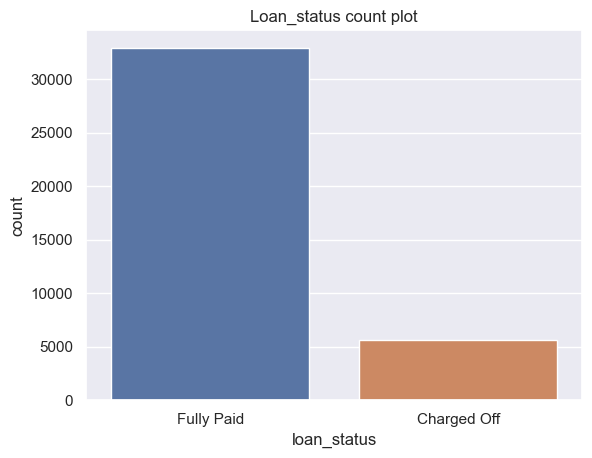

In [394]:
# ploting a count plt for loan status for two varaibles Fully Paid and Charged Off
print(main_csv['loan_status'].value_counts())
sns.countplot(data=main_csv,x=main_csv['loan_status'])
plt.title('Loan_status count plot')
plt.show()

Insights
1. In above graph we able to find that 32950 persons are fully_paid the loan
2. And 5627 persons Charged Off inbetween.

In [395]:
main_csv.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0  5000       5000         4975.0            36 months  10.65%   162.87        
1  2500       2500         2500.0            60 months  15.27%   59.83         
2  2400       2400         2400.0            36 months  15.96%   84.33         
3  10000      10000        10000.0           36 months  13.49%   339.31        
5  5000       5000         5000.0            36 months  7.90%    156.46        

  grade sub_grade             emp_title emp_length home_ownership  annual_inc  \
0  B     B2        NaN                   10+ years  RENT           24000.0      
1  C     C4        Ryder                 < 1 year   RENT           30000.0      
2  C     C5        NaN                   10+ years  RENT           12252.0      
3  C     C1        AIR RESOURCES BOARD   10+ years  RENT           49200.0      
5  A     A4        Veolia Transportaton  3 years    RENT           36000.0      

  verification_status issue_d  loan_status         purpose  \
0  Verified            Dec-11  Fully Paid   credit_card      
1  Source Verified     Dec-11  Charged Off  car              
2  Not Verified        Dec-11  Fully Paid   small_business   
3  Source Verified     Dec-11  Fully Paid   other            
5  Source Verified     Dec-11  Fully Paid   wedding          

                                   title addr_state    dti  
0  Computer                               AZ         27.65  
1  bike                                   GA         1.00   
2  real estate business                   IL         8.72   
3  personel                               CA         20.00  
5  My wedding loan I promise to pay back  AZ         11.20

<AxesSubplot:>

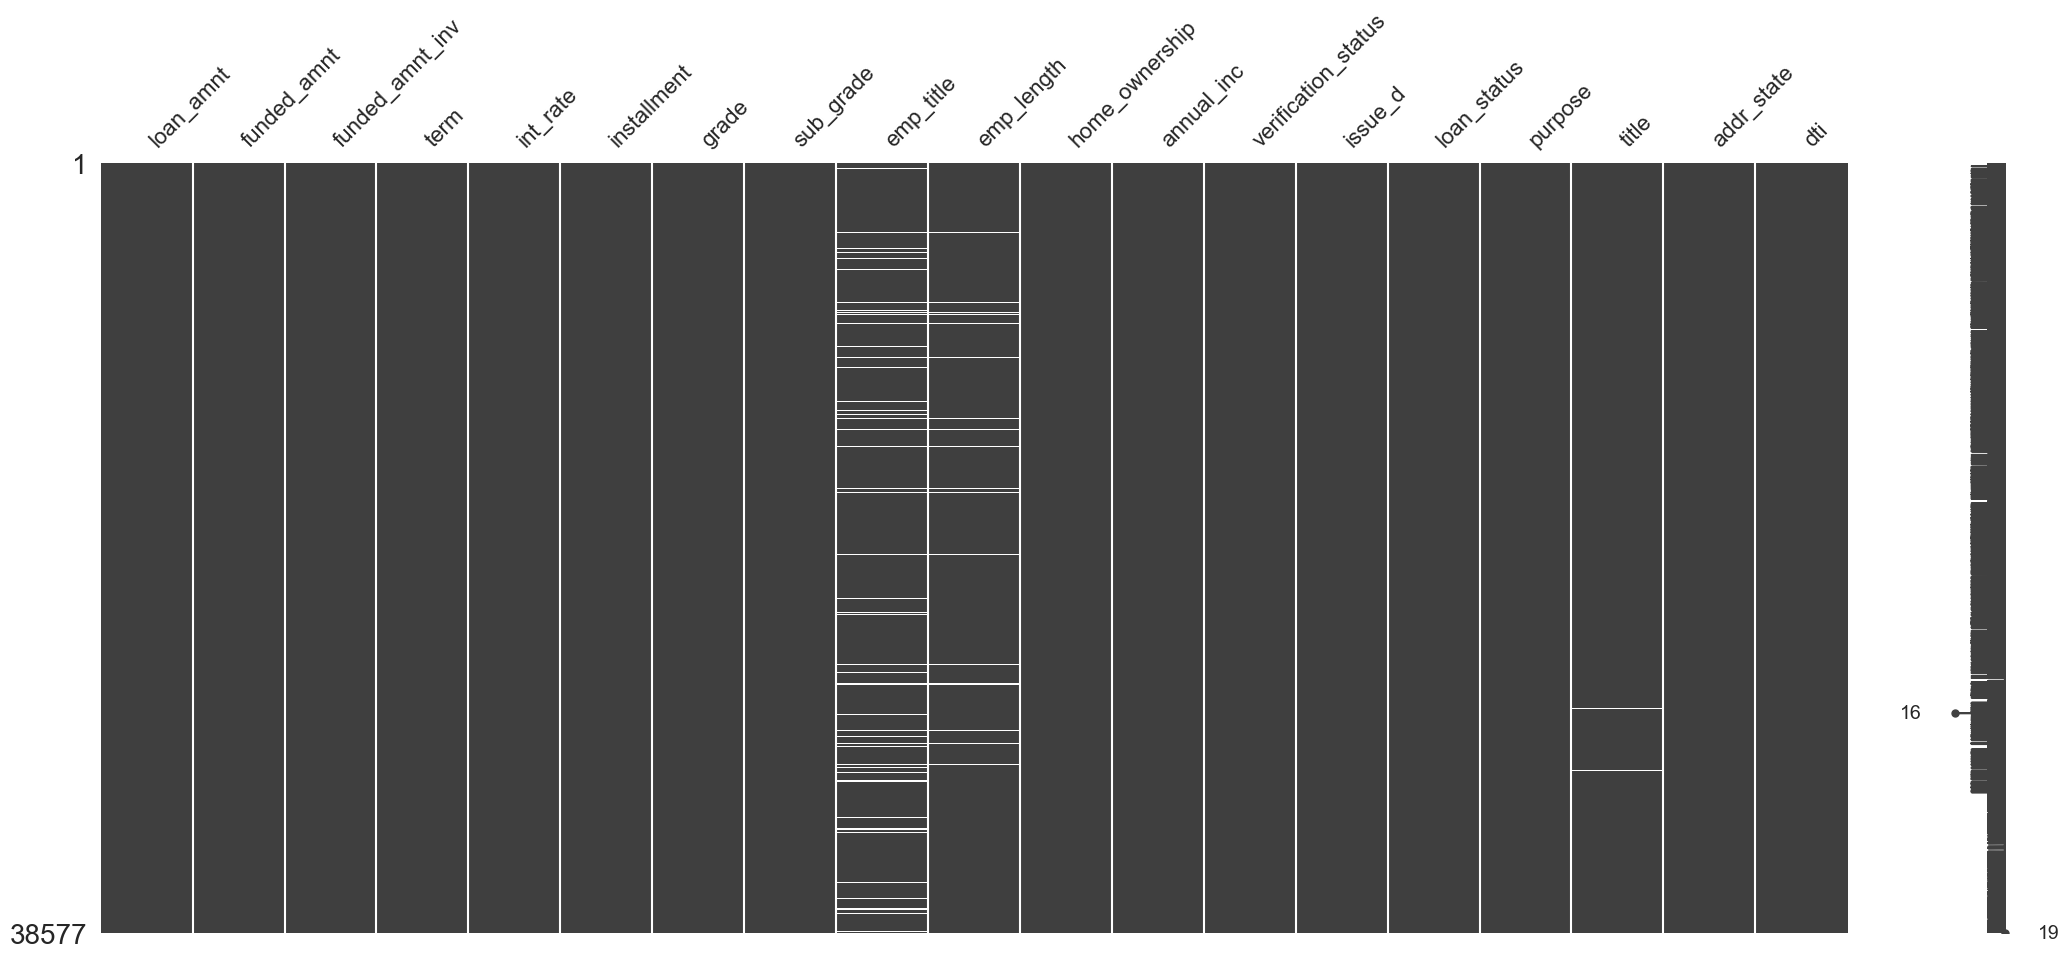

In [396]:
# matrix plot after rmoving current values 
msno.matrix(main_csv)

In [397]:
main_csv.dtypes

loan_amnt              int64  
funded_amnt            int64  
funded_amnt_inv        float64
term                   object 
int_rate               object 
installment            float64
grade                  object 
sub_grade              object 
emp_title              object 
emp_length             object 
home_ownership         object 
annual_inc             float64
verification_status    object 
issue_d                object 
loan_status            object 
purpose                object 
title                  object 
addr_state             object 
dti                    float64
dtype: object

### cleanning the data -
1) removing % from interest rate so it used for calculation

2) And seprating issued_d date in months and year

3) And in upper bar graph we still able to see three columns have missing values

4) And removing NONE from home_ownership



In [398]:
#change the type of int_rate column from string to float
main_csv['int_rate']=main_csv['int_rate'].str.replace('%','')
main_csv['int_rate'] = pd.to_numeric(main_csv['int_rate'])

In [399]:
main_csv.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0  5000       5000         4975.0            36 months  10.65     162.87        
1  2500       2500         2500.0            60 months  15.27     59.83         
2  2400       2400         2400.0            36 months  15.96     84.33         
3  10000      10000        10000.0           36 months  13.49     339.31        
5  5000       5000         5000.0            36 months  7.90      156.46        

  grade sub_grade             emp_title emp_length home_ownership  annual_inc  \
0  B     B2        NaN                   10+ years  RENT           24000.0      
1  C     C4        Ryder                 < 1 year   RENT           30000.0      
2  C     C5        NaN                   10+ years  RENT           12252.0      
3  C     C1        AIR RESOURCES BOARD   10+ years  RENT           49200.0      
5  A     A4        Veolia Transportaton  3 years    RENT           36000.0      

  verification_status issue_d  loan_status         purpose  \
0  Verified            Dec-11  Fully Paid   credit_card      
1  Source Verified     Dec-11  Charged Off  car              
2  Not Verified        Dec-11  Fully Paid   small_business   
3  Source Verified     Dec-11  Fully Paid   other            
5  Source Verified     Dec-11  Fully Paid   wedding          

                                   title addr_state    dti  
0  Computer                               AZ         27.65  
1  bike                                   GA         1.00   
2  real estate business                   IL         8.72   
3  personel                               CA         20.00  
5  My wedding loan I promise to pay back  AZ         11.20

In [400]:
#converting issue date to date time
main_csv.issue_d = pd.to_datetime(main_csv.issue_d, format='%b-%y')


#### Deriverd variables

In [401]:
# creating two derived columns for month and year
main_csv['month'] = main_csv['issue_d'].dt.month
main_csv['year'] = main_csv['issue_d'].dt.year

In [402]:
main_csv.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0  5000       5000         4975.0            36 months  10.65     162.87        
1  2500       2500         2500.0            60 months  15.27     59.83         
2  2400       2400         2400.0            36 months  15.96     84.33         
3  10000      10000        10000.0           36 months  13.49     339.31        
5  5000       5000         5000.0            36 months  7.90      156.46        

  grade sub_grade             emp_title emp_length home_ownership  annual_inc  \
0  B     B2        NaN                   10+ years  RENT           24000.0      
1  C     C4        Ryder                 < 1 year   RENT           30000.0      
2  C     C5        NaN                   10+ years  RENT           12252.0      
3  C     C1        AIR RESOURCES BOARD   10+ years  RENT           49200.0      
5  A     A4        Veolia Transportaton  3 years    RENT           36000.0      

  verification_status    issue_d  loan_status         purpose  \
0  Verified           2011-12-01  Fully Paid   credit_card      
1  Source Verified    2011-12-01  Charged Off  car              
2  Not Verified       2011-12-01  Fully Paid   small_business   
3  Source Verified    2011-12-01  Fully Paid   other            
5  Source Verified    2011-12-01  Fully Paid   wedding          

                                   title addr_state    dti  month  year  
0  Computer                               AZ         27.65  12     2011  
1  bike                                   GA         1.00   12     2011  
2  real estate business                   IL         8.72   12     2011  
3  personel                               CA         20.00  12     2011  
5  My wedding loan I promise to pay back  AZ         11.20  12     2011

2011    20516
2010    11532
2009    4716 
2008    1562 
2007    251  
Name: year, dtype: int64


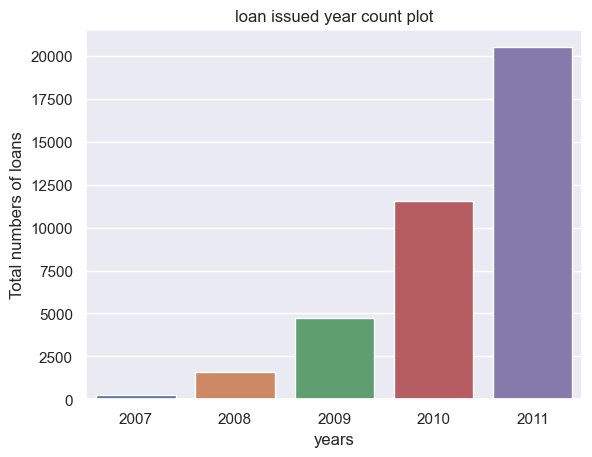

In [403]:
# ploting a count plt for loan status for two varaibles Fully Paid and Charged Off
print(main_csv['year'].value_counts())
sns.countplot(data=main_csv,x=main_csv['year'])
plt.title('loan issued year count plot')
plt.xlabel('years')
plt.ylabel('Total numbers of loans')
plt.show()

In above counter plot we able to seen that In 2011 they approved highest loans and in 2007 lowest loan the series of year no. of loan issued-  2007 < 2008 < 2009 < 2010 < 2011

In [404]:
# updating data of employ length
main_csv["emp_length"]= main_csv["emp_length"].str.replace("10+ years", "10")
main_csv["emp_length"]= main_csv["emp_length"].str.replace("< 1 year", "0")
main_csv["emp_length"]= main_csv["emp_length"].str.replace("years", "")
main_csv["emp_length"]= main_csv["emp_length"].str.replace("year", "")
main_csv["emp_length"]= main_csv["emp_length"].str.replace("+", "")

C:\Users\admin\AppData\Local\Temp\ipykernel_10616\2896735232.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  main_csv["emp_length"]= main_csv["emp_length"].str.replace("10+ years", "10")
C:\Users\admin\AppData\Local\Temp\ipykernel_10616\2896735232.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  main_csv["emp_length"]= main_csv["emp_length"].str.replace("+", "")


In [405]:
main_csv["title"].fillna("NA", inplace=True)
main_csv["emp_title"].fillna("NA", inplace=True)

In [343]:
main_csv.head(20)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0   1077501  1296599    5000       5000         4975.0            36 months   
1   1077430  1314167    2500       2500         2500.0            60 months   
2   1077175  1313524    2400       2400         2400.0            36 months   
3   1076863  1277178    10000      10000        10000.0           36 months   
4   1075358  1311748    3000       3000         3000.0            60 months   
5   1075269  1311441    5000       5000         5000.0            36 months   
6   1069639  1304742    7000       7000         7000.0            60 months   
7   1072053  1288686    3000       3000         3000.0            36 months   
8   1071795  1306957    5600       5600         5600.0            60 months   
9   1071570  1306721    5375       5375         5350.0            60 months   
10  1070078  1305201    6500       6500         6500.0            60 months   
11  1069908  1305008    12000      12000        12000.0           36 months   
12  1064687  1298717    9000       9000         9000.0            36 months   
13  1069866  1304956    3000       3000         3000.0            36 months   
14  1069057  1303503    10000      10000        10000.0           36 months   
15  1069759  1304871    1000       1000         1000.0            36 months   
16  1065775  1299699    10000      10000        10000.0           36 months   
17  1069971  1304884    3600       3600         3600.0            36 months   
18  1062474  1294539    6000       6000         6000.0            36 months   
19  1069742  1304855    9200       9200         9200.0            36 months   

   int_rate  installment grade sub_grade                            emp_title  \
0   10.65%   162.87       B     B2        NA                                    
1   15.27%   59.83        C     C4        Ryder                                 
2   15.96%   84.33        C     C5        NA                                    
3   13.49%   339.31       C     C1        AIR RESOURCES BOARD                   
4   12.69%   67.79        B     B5        University Medical Group              
5   7.90%    156.46       A     A4        Veolia Transportaton                  
6   15.96%   170.08       C     C5        Southern Star Photography             
7   18.64%   109.43       E     E1        MKC Accounting                        
8   21.28%   152.39       F     F2        NA                                    
9   12.69%   121.45       B     B5        Starbucks                             
10  14.65%   153.45       C     C3        Southwest Rural metro                 
11  12.69%   402.54       B     B5        UCLA                                  
12  13.49%   305.38       C     C1        Va. Dept of Conservation/Recreation   
13  9.91%    96.68        B     B1        Target                                
14  10.65%   325.74       B     B2        SFMTA                                 
15  16.29%   35.31        D     D1        Internal revenue Service              
16  15.27%   347.98       C     C4        Chin's Restaurant                     
17  6.03%    109.57       A     A1        Duracell                              
18  11.71%   198.46       B     B3        Connection Inspection                 
19  6.03%    280.01       A     A1        Network Interpreting Service          

   emp_length home_ownership  annual_inc verification_status    issue_d  \
0   10         RENT           24000.00    Verified           2011-12-01   
1   0          RENT           30000.00    Source Verified    2011-12-01   
2   10         RENT           12252.00    Not Verified       2011-12-01   
3   10         RENT           49200.00    Source Verified    2011-12-01   
4   1          RENT           80000.00    Source Verified    2011-12-01   
5   3          RENT           36000.00    Source Verified    2011-12-01   
6   8          RENT           47004.00    Not Verified       2011-12-01   
7   9          RENT           48000.00    Sourc

In [344]:
# dropping the rows of home_ownership which have NONE values-
main_csv = main_csv[main_csv['home_ownership'] != 'NONE']

In [345]:
main_csv.head(20)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0   1077501  1296599    5000       5000         4975.0            36 months   
1   1077430  1314167    2500       2500         2500.0            60 months   
2   1077175  1313524    2400       2400         2400.0            36 months   
3   1076863  1277178    10000      10000        10000.0           36 months   
4   1075358  1311748    3000       3000         3000.0            60 months   
5   1075269  1311441    5000       5000         5000.0            36 months   
6   1069639  1304742    7000       7000         7000.0            60 months   
7   1072053  1288686    3000       3000         3000.0            36 months   
8   1071795  1306957    5600       5600         5600.0            60 months   
9   1071570  1306721    5375       5375         5350.0            60 months   
10  1070078  1305201    6500       6500         6500.0            60 months   
11  1069908  1305008    12000      12000        12000.0           36 months   
12  1064687  1298717    9000       9000         9000.0            36 months   
13  1069866  1304956    3000       3000         3000.0            36 months   
14  1069057  1303503    10000      10000        10000.0           36 months   
15  1069759  1304871    1000       1000         1000.0            36 months   
16  1065775  1299699    10000      10000        10000.0           36 months   
17  1069971  1304884    3600       3600         3600.0            36 months   
18  1062474  1294539    6000       6000         6000.0            36 months   
19  1069742  1304855    9200       9200         9200.0            36 months   

   int_rate  installment grade sub_grade                            emp_title  \
0   10.65%   162.87       B     B2        NA                                    
1   15.27%   59.83        C     C4        Ryder                                 
2   15.96%   84.33        C     C5        NA                                    
3   13.49%   339.31       C     C1        AIR RESOURCES BOARD                   
4   12.69%   67.79        B     B5        University Medical Group              
5   7.90%    156.46       A     A4        Veolia Transportaton                  
6   15.96%   170.08       C     C5        Southern Star Photography             
7   18.64%   109.43       E     E1        MKC Accounting                        
8   21.28%   152.39       F     F2        NA                                    
9   12.69%   121.45       B     B5        Starbucks                             
10  14.65%   153.45       C     C3        Southwest Rural metro                 
11  12.69%   402.54       B     B5        UCLA                                  
12  13.49%   305.38       C     C1        Va. Dept of Conservation/Recreation   
13  9.91%    96.68        B     B1        Target                                
14  10.65%   325.74       B     B2        SFMTA                                 
15  16.29%   35.31        D     D1        Internal revenue Service              
16  15.27%   347.98       C     C4        Chin's Restaurant                     
17  6.03%    109.57       A     A1        Duracell                              
18  11.71%   198.46       B     B3        Connection Inspection                 
19  6.03%    280.01       A     A1        Network Interpreting Service          

   emp_length home_ownership  annual_inc verification_status    issue_d  \
0   10         RENT           24000.00    Verified           2011-12-01   
1   0          RENT           30000.00    Source Verified    2011-12-01   
2   10         RENT           12252.00    Not Verified       2011-12-01   
3   10         RENT           49200.00    Source Verified    2011-12-01   
4   1          RENT           80000.00    Source Verified    2011-12-01   
5   3          RENT           36000.00    Source Verified    2011-12-01   
6   8          RENT           47004.00    Not Verified       2011-12-01   
7   9          RENT           48000.00    Sourc

In [346]:
main_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39714 entries, 0 to 39716
Columns: 113 entries, id to year
dtypes: datetime64[ns](1), float64(74), int64(15), object(23)
memory usage: 34.5+ MB


as we able to seen here that most of the datatypes are have object type but we need some varables in numerical type for data analysis

In [347]:
# converting object data type into numeric data type
cols = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti','emp_length']
main_csv[cols] = main_csv[cols].apply(pd.to_numeric)

In [45]:
main_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38574 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            38574 non-null  int64         
 1   funded_amnt          38574 non-null  int64         
 2   funded_amnt_inv      38574 non-null  float64       
 3   term                 38574 non-null  object        
 4   int_rate             38574 non-null  float64       
 5   installment          38574 non-null  float64       
 6   grade                38574 non-null  object        
 7   sub_grade            38574 non-null  object        
 8   emp_title            38574 non-null  object        
 9   emp_length           37541 non-null  float64       
 10  home_ownership       38574 non-null  object        
 11  annual_inc           38574 non-null  float64       
 12  verification_status  38574 non-null  object        
 13  issue_d              38574 non-

<AxesSubplot:>

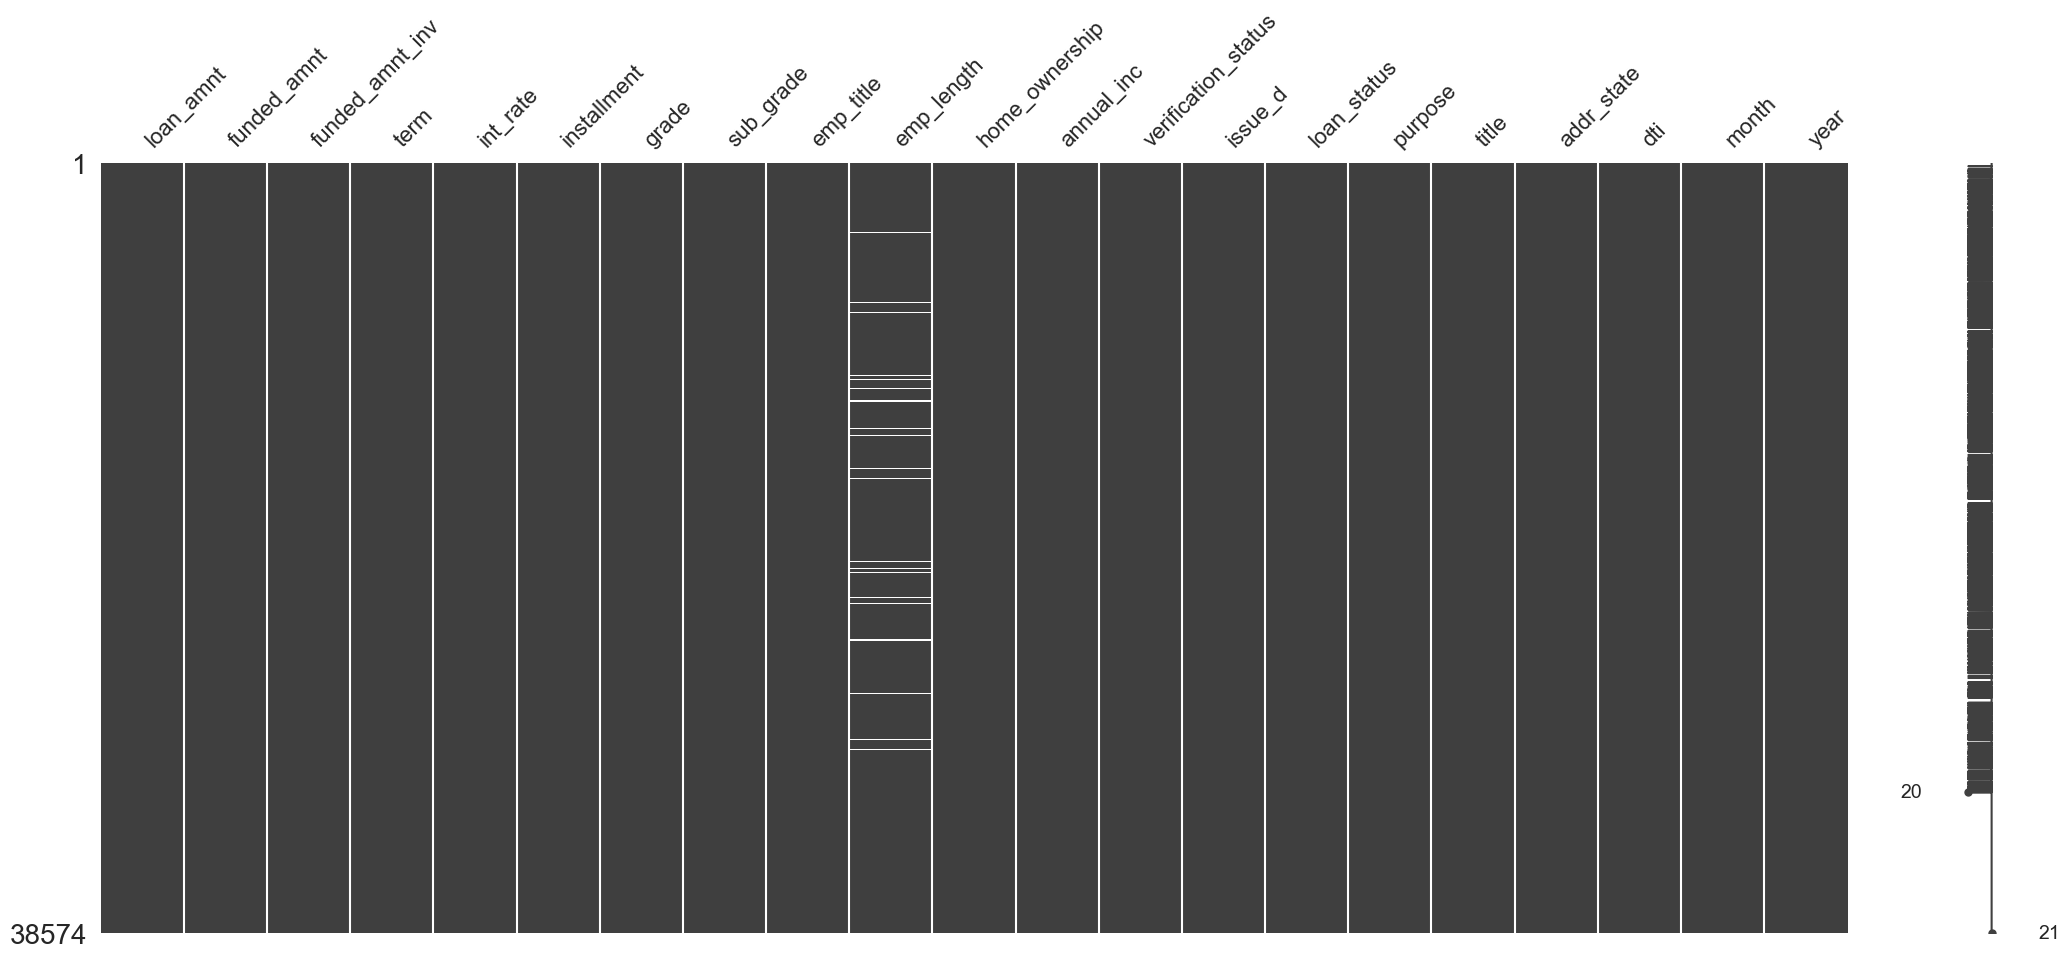

In [46]:
msno.matrix(main_csv)

In [47]:
print(main_csv['emp_title'].value_counts())

NA                                                                                2384
US Army                                                                           131 
Bank of America                                                                   107 
IBM                                                                               65  
AT&T                                                                              57  
Kaiser Permanente                                                                 56  
Wells Fargo                                                                       52  
USAF                                                                              52  
UPS                                                                               52  
US Air Force                                                                      51  
Walmart                                                                           45  
United States Air Force                    

In [48]:
print(main_csv['title'].value_counts())

Debt Consolidation                                                                   2090
Debt Consolidation Loan                                                              1620
Personal Loan                                                                        641 
Consolidation                                                                        491 
debt consolidation                                                                   478 
Credit Card Consolidation                                                            348 
Home Improvement                                                                     345 
Debt consolidation                                                                   322 
Small Business Loan                                                                  305 
Personal                                                                             301 
Credit Card Loan                                                                     301 
Consolidat

In [49]:
# After analysing Data of title and emp_title able to analyse its not usable so droping these two columns-
main_csv=main_csv = main_csv.drop(['title','emp_title'], axis = 1)

In [50]:
main_csv.shape

(38574, 19)

In [51]:
main_csv.head(5)

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0  5000       5000         4975.0            36 months  10.65     162.87        
1  2500       2500         2500.0            60 months  15.27     59.83         
2  2400       2400         2400.0            36 months  15.96     84.33         
3  10000      10000        10000.0           36 months  13.49     339.31        
5  5000       5000         5000.0            36 months  7.90      156.46        

  grade sub_grade  emp_length home_ownership  annual_inc verification_status  \
0  B     B2        10.0        RENT           24000.0     Verified             
1  C     C4        0.0         RENT           30000.0     Source Verified      
2  C     C5        10.0        RENT           12252.0     Not Verified         
3  C     C1        10.0        RENT           49200.0     Source Verified      
5  A     A4        3.0         RENT           36000.0     Source Verified      

     issue_d  loan_status         purpose addr_state    dti  month  year  
0 2011-12-01  Fully Paid   credit_card     AZ         27.65  12     2011  
1 2011-12-01  Charged Off  car             GA         1.00   12     2011  
2 2011-12-01  Fully Paid   small_business  IL         8.72   12     2011  
3 2011-12-01  Fully Paid   other           CA         20.00  12     2011  
5 2011-12-01  Fully Paid   wedding         AZ         11.20  12     2011

## Outliers treatmernt 
for numerical datatypes variable

In [52]:
main_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38574 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            38574 non-null  int64         
 1   funded_amnt          38574 non-null  int64         
 2   funded_amnt_inv      38574 non-null  float64       
 3   term                 38574 non-null  object        
 4   int_rate             38574 non-null  float64       
 5   installment          38574 non-null  float64       
 6   grade                38574 non-null  object        
 7   sub_grade            38574 non-null  object        
 8   emp_length           37541 non-null  float64       
 9   home_ownership       38574 non-null  object        
 10  annual_inc           38574 non-null  float64       
 11  verification_status  38574 non-null  object        
 12  issue_d              38574 non-null  datetime64[ns]
 13  loan_status          38574 non-

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

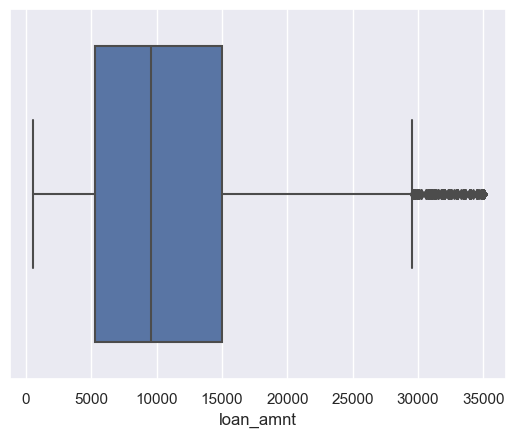

In [53]:
sns.boxplot(main_csv.loan_amnt)


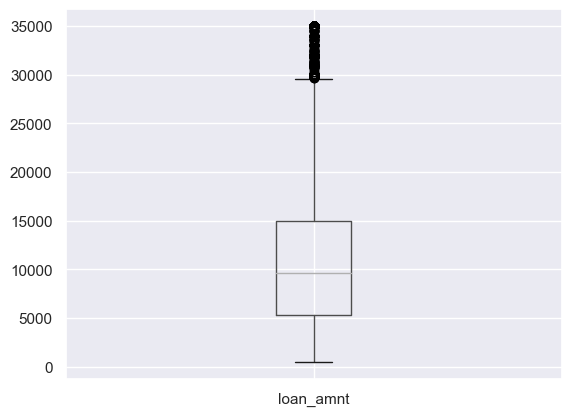

In [406]:
main_csv.boxplot(column=['loan_amnt']);

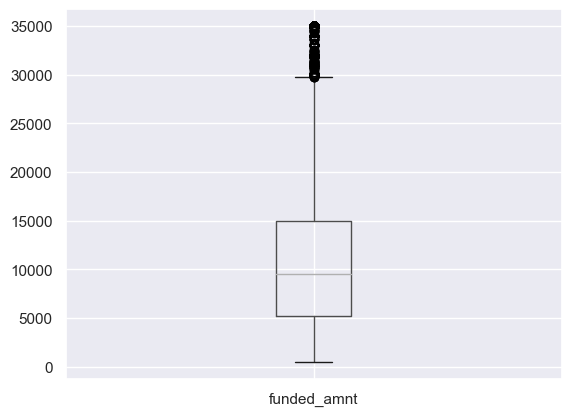

In [407]:
main_csv.boxplot(column=['funded_amnt']);

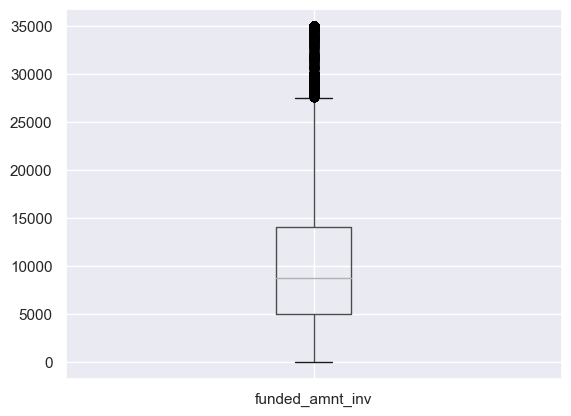

In [408]:
main_csv.boxplot(column=['funded_amnt_inv']);

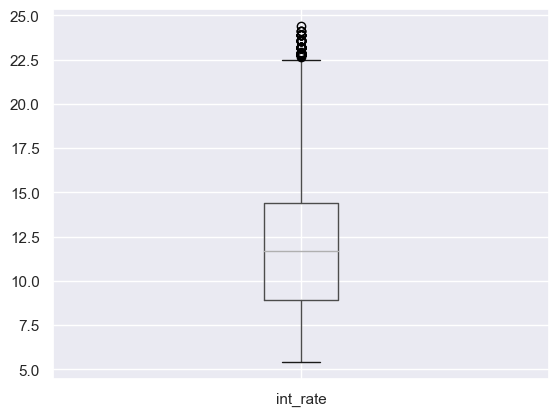

In [409]:
main_csv.boxplot(column=['int_rate']);

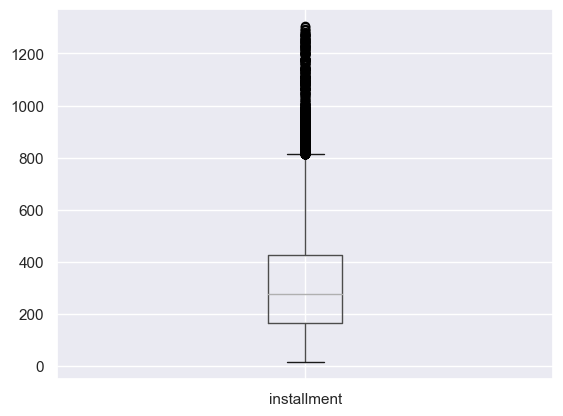

In [410]:
main_csv.boxplot(column=['installment']);

KeyError: "None of [Index(['emp_length'], dtype='object')] are in the [columns]"

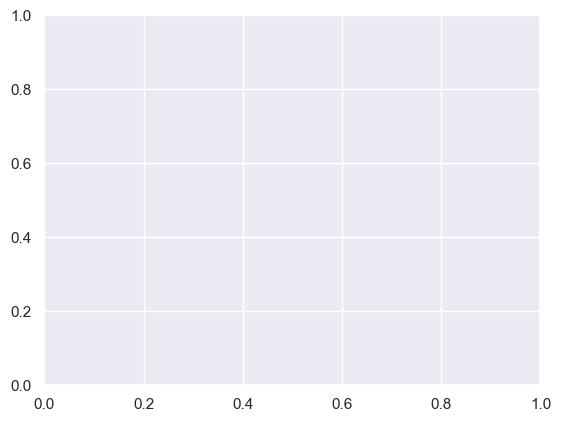

In [411]:
main_csv.boxplot(column=['emp_length']);

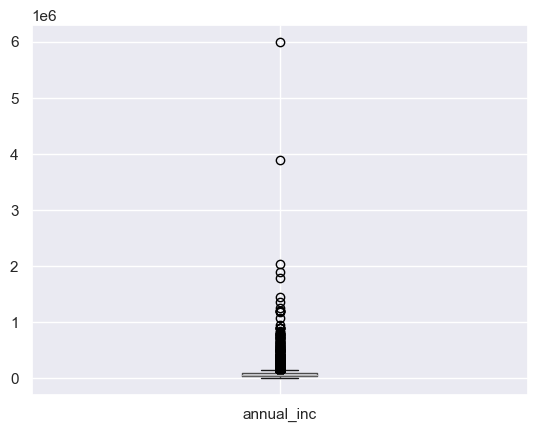

In [412]:
main_csv.boxplot(column=['annual_inc']);


As we able to seen that in annual_inc boxplot have outliers so we going to remove them and nearest 0.95 quantile droping here for consisting data analysis

In [413]:
annual_inc95 = main_csv['annual_inc'].quantile(0.95)
main_csv = main_csv[main_csv['annual_inc'] <= annual_inc95]

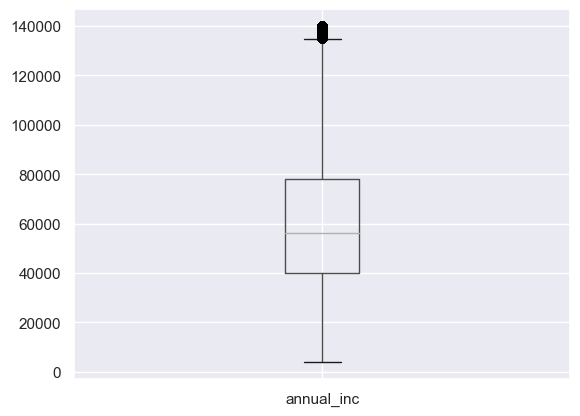

In [414]:
main_csv.boxplot(column=['annual_inc']);

Now we able to see not persent any outliers which affecting data analysis.

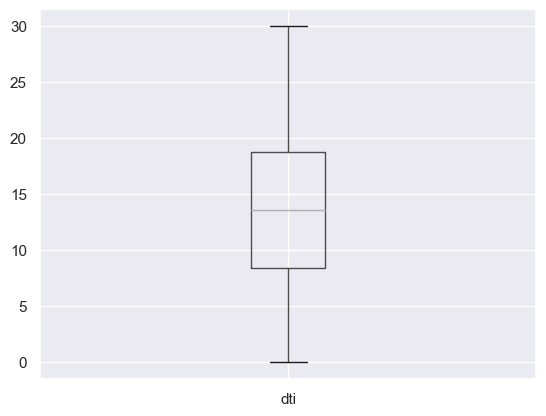

In [415]:
main_csv.boxplot(column=['dti']);

                     
                       
                    


# Univariate Analsys

In [416]:
main_csv.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'month',
       'year'],
      dtype='object')

1) Univariate numerical variable analysis

loan_amnt 

funded_amnt

funded_amnt_inv

int_rate

installment

annual_inc

emp_length

dti

month

year


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

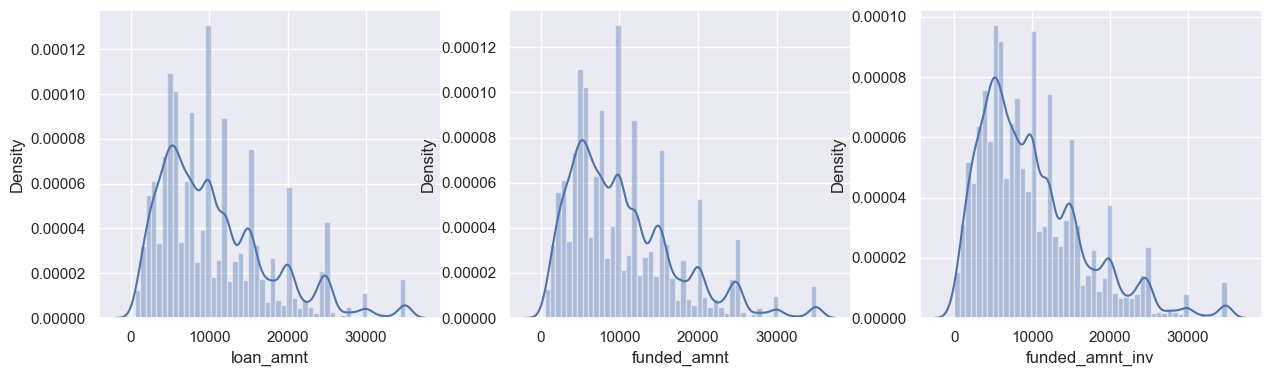

In [417]:
#setting figure size of plot
plt.figure(figsize=(15,4))

#subplot index
plt.subplot(1,3,1)

#Distribution plot
sns.distplot(main_csv['loan_amnt'])

#subplot index
plt.subplot(1,3,2)

#Distribution plot
sns.distplot(main_csv['funded_amnt'])

#subplot index
plt.subplot(1,3,3)

#Distribution plot
sns.distplot(main_csv['funded_amnt_inv'])
plt.show()


here we able to seen that loan amount and funded_amount_inv are look like same for data analysis we refer loan_amnt

10     7888
0      4327
2      4101
3      3824
4      3200
5      3044
1      3043
6      2073
7      1644
8      1343
9      1153
Name: emp_length, dtype: int64


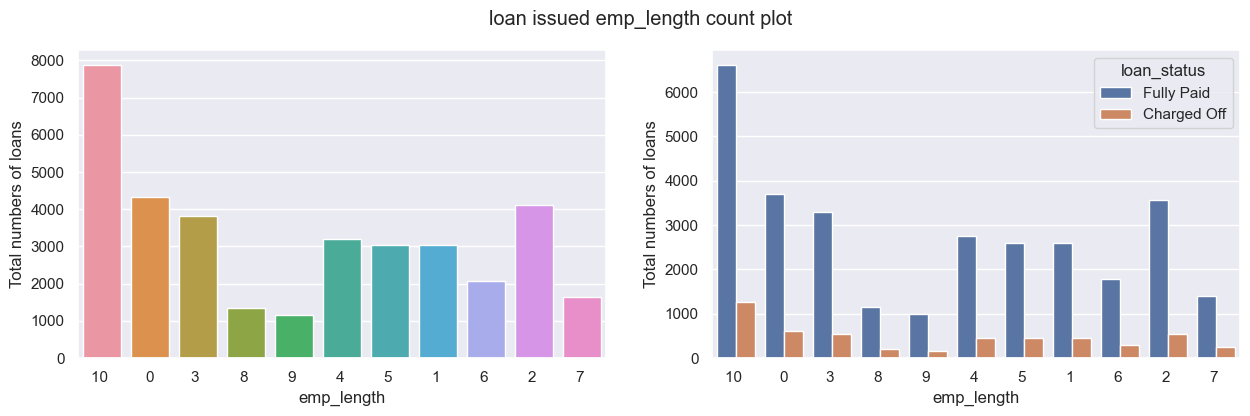

In [418]:
# count plot for emp_length and 

print(main_csv['emp_length'].value_counts())
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)

sns.countplot(data=main_csv,x=main_csv['emp_length'])
plt.ylabel('Total numbers of loans')

plt.subplot(1,2,2)

sns.countplot(data=main_csv,x='emp_length',hue='loan_status')
plt.suptitle('loan issued emp_length count plot')

plt.ylabel('Total numbers of loans')
plt.show()

#### Insights-
1) More then 10 years experience employee have majority borrower

2) More thne 10 yeras employee charged off in majority 

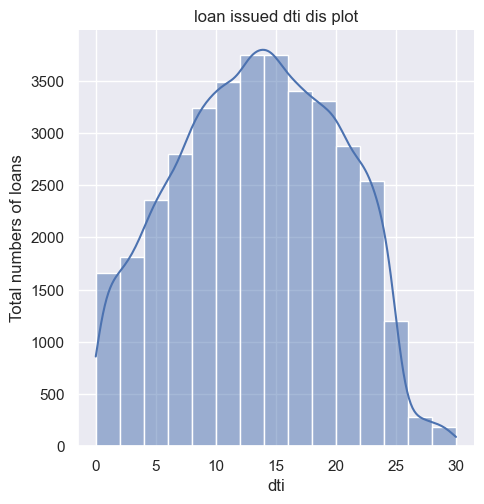

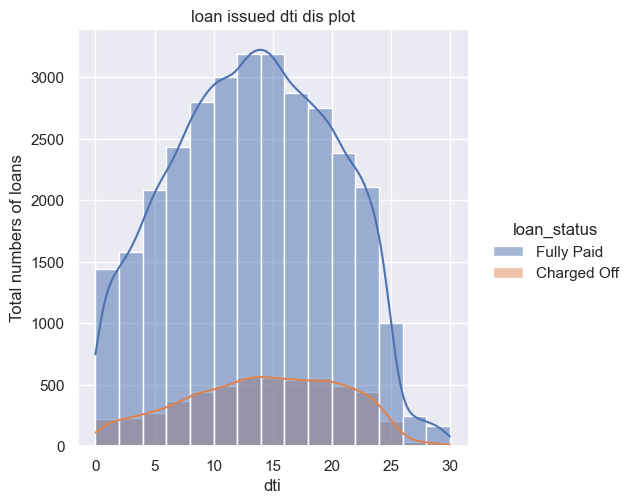

In [419]:
# distribution plot for dti and 
sns.displot(data=main_csv,x=main_csv['dti'],bins=15,kde=True)
plt.title('loan issued dti dis plot')
plt.xlabel('dti')
plt.ylabel('Total numbers of loans')
plt.grid(True);
plt.show()

sns.displot(data=main_csv,x='dti',hue='loan_status',bins=15,kde=True)
plt.title('loan issued dti dis plot')
plt.ylabel('Total numbers of loans')
plt.show()

#### Insights 
Majority of borrowers have greter debit respect to monthly earnings for dti ratio in between 9 to 16 and those are also in majority of charged off.

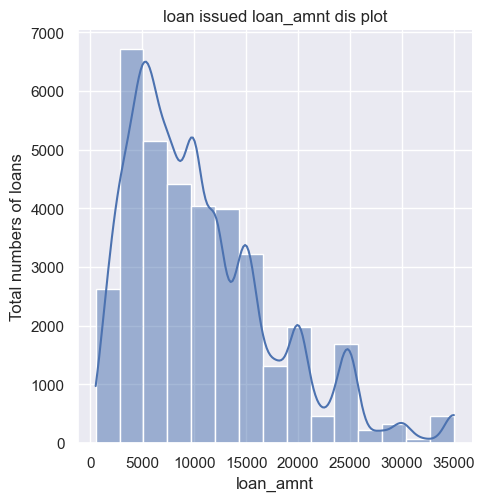

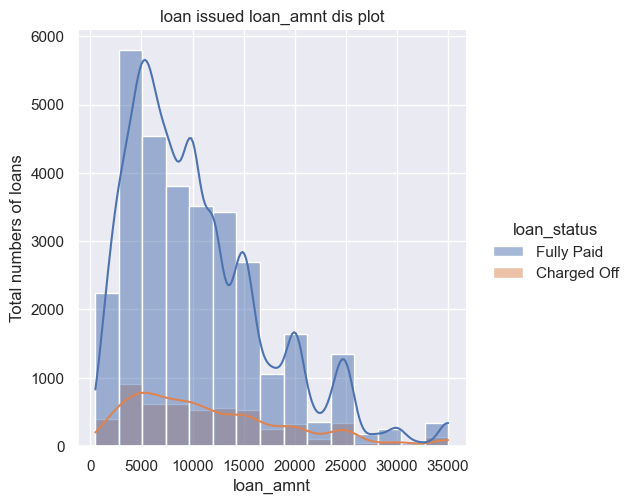

In [139]:
# distribution plot for loan_amnt and 
sns.displot(data=main_csv,x=main_csv['loan_amnt'],bins=15,kde=True)
plt.title('loan issued loan_amnt dis plot')
plt.xlabel('loan_amnt')
plt.ylabel('Total numbers of loans')
plt.grid(True);
plt.show()

sns.displot(data=main_csv,x='loan_amnt',hue='loan_status',bins=15,kde=True)
plt.title('loan issued loan_amnt dis plot')
plt.ylabel('Total numbers of loans')
plt.show()

#### Insights 
Majority of borrowers applied for loan amount between 5k to 15k majority of charged off which applied for loan amount 4k to 12k

<Figure size 1500x400 with 0 Axes>

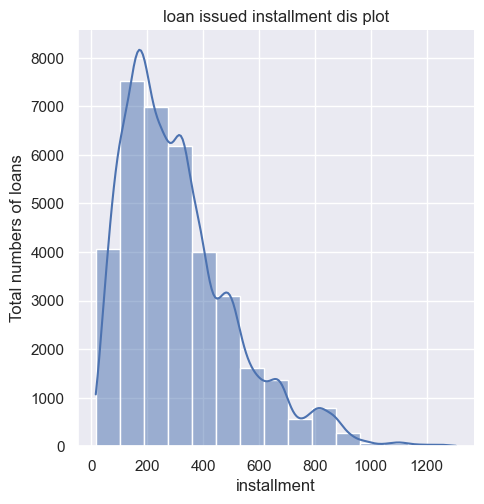

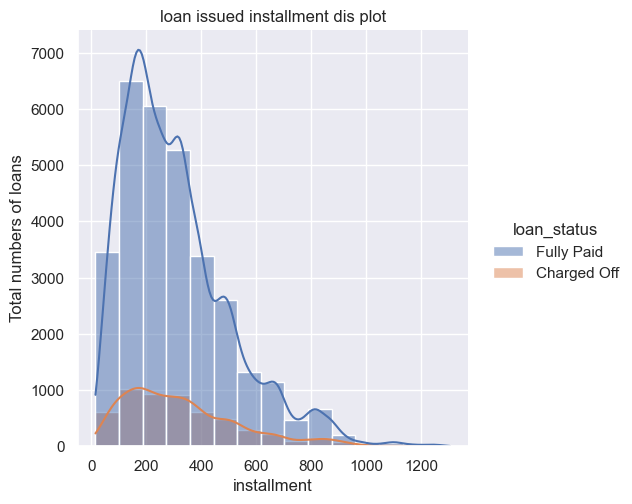

In [113]:
# distribution plot for installment and 
plt.figure(figsize=(15,4))

sns.displot(data=main_csv,x=main_csv['installment'],bins=15,kde=True)
plt.title('loan issued installment dis plot')
plt.xlabel('installment')
plt.ylabel('Total numbers of loans')
plt.grid(True);
plt.show()




sns.displot(data=main_csv,x='installment',hue='loan_status',bins=15,kde=True)
plt.title('loan issued installment dis plot')
plt.ylabel('Total numbers of loans')
plt.grid(True)
plt.show()

#### Insights
From Installment data, we can say that most of them have taken loan who paying installment inbetween 200 to 400.

Charged Off loan status is also high for same range(200-400)

2011    19446
2010    11013
2009    4476 
2008    1488 
2007    228  
Name: year, dtype: int64


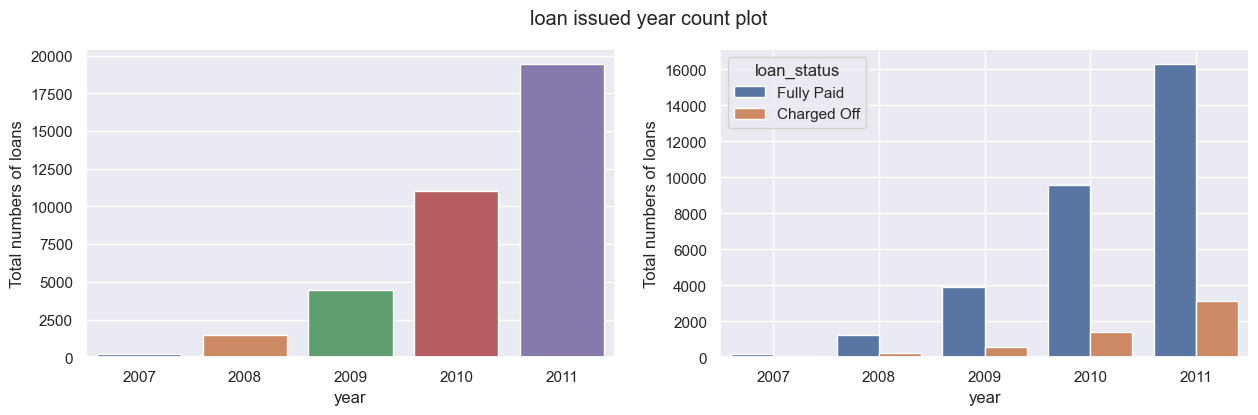

In [114]:
# count plot for year and 

print(main_csv['year'].value_counts())
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)

sns.countplot(data=main_csv,x=main_csv['year'])
plt.ylabel('Total numbers of loans')

plt.subplot(1,2,2)

sns.countplot(data=main_csv,x='year',hue='loan_status')
plt.ylabel('Total numbers of loans')

plt.suptitle('loan issued year count plot')
plt.grid(True)
plt.show()

#### Insights
From year wise data, we can say that most of them have taken loan in year 2011 and its increasing from 2007 to 2011 continuously

Charged Off loan status is also high for same year

12    4019
11    3820
10    3533
9     3291
8     3213
7     3196
6     3008
5     2788
4     2713
3     2552
1     2267
2     2251
Name: month, dtype: int64


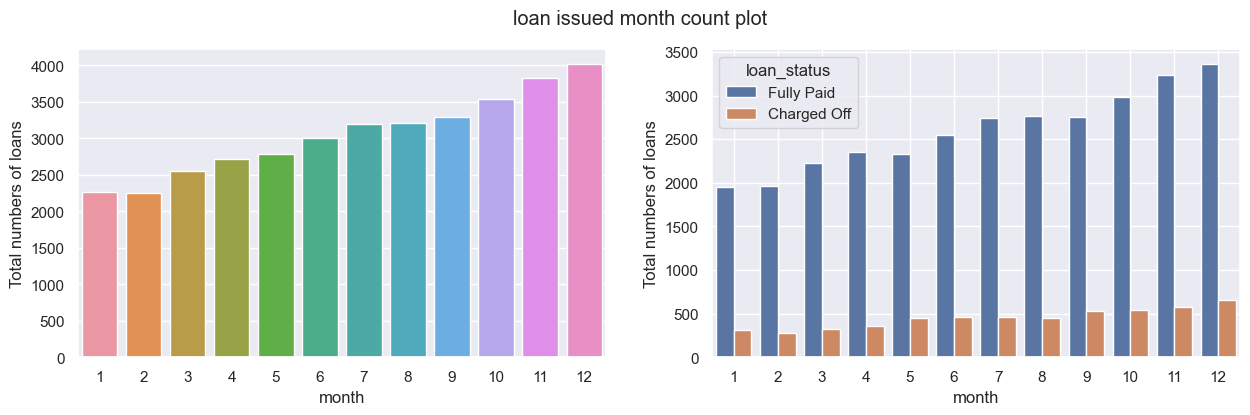

In [115]:
# count plot for month and


print(main_csv['month'].value_counts())
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)

sns.countplot(data=main_csv,x=main_csv['month'])
plt.ylabel('Total numbers of loans')

plt.subplot(1,2,2)

sns.countplot(data=main_csv,x='month',hue='loan_status')
plt.ylabel('Total numbers of loans')

plt.suptitle('loan issued month count plot')
plt.grid(True)
plt.show()

#### Insights
From monthly wise data, we can say that most of them have taken loan in year's last months.

Charged Off loan status is also high for the end of the months

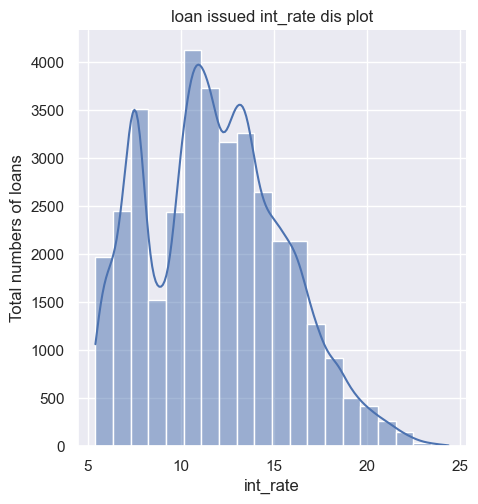

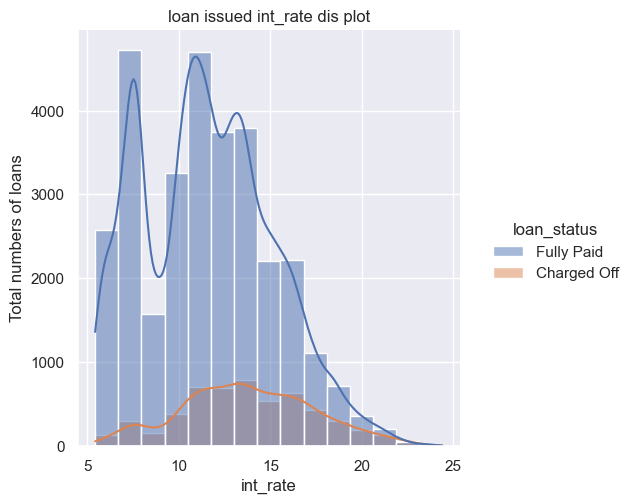

In [116]:
# distribution plot for int_rate and 
sns.displot(data=main_csv,x=main_csv['int_rate'],bins=20,kde=True)
plt.title('loan issued int_rate dis plot')
plt.ylabel('Total numbers of loans')
plt.grid(True);
plt.show()


sns.displot(data=main_csv,x='int_rate',hue='loan_status',bins=15,kde=True)
plt.title('loan issued int_rate dis plot')
plt.ylabel('Total numbers of loans')
plt.grid(True)
plt.show()

#### Insights

Borrowers no. increased between 5 to 8 and 10 to 15 but its going down in between 8 to 10. And same followings for charged off.

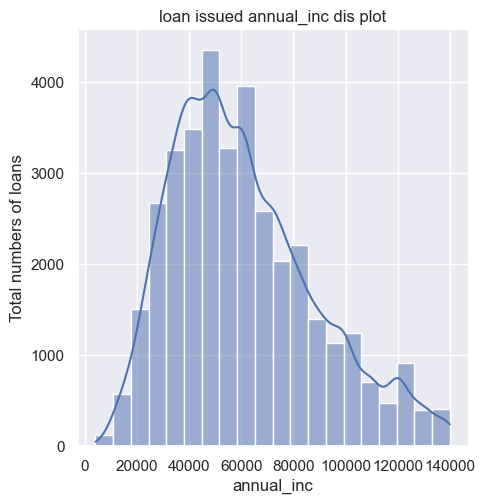

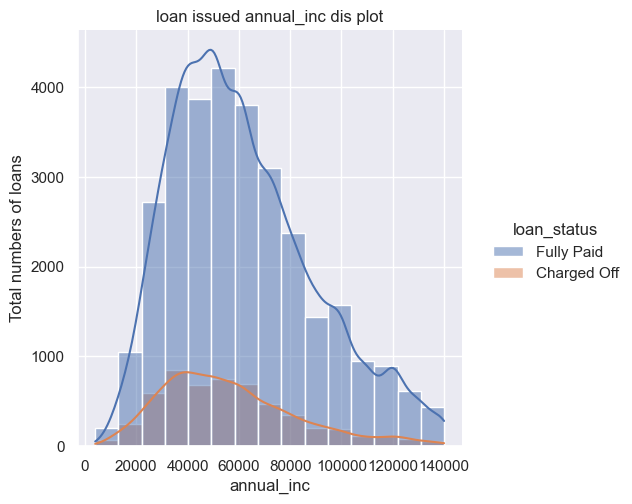

In [117]:
# distribution plot for annual_inc and 
sns.displot(data=main_csv,x=main_csv['annual_inc'],bins=20,kde=True)
plt.title('loan issued annual_inc dis plot')
plt.xlabel('annual_inc')
plt.ylabel('Total numbers of loans')
plt.grid(True);
plt.show()

sns.displot(data=main_csv,x='annual_inc',hue='loan_status',bins=15,kde=True)
plt.title('loan issued annual_inc dis plot')
plt.ylabel('Total numbers of loans')
plt.grid(True)
plt.show()


#### Insights

Most of prpole taking loan which have lower(30k-80k) income and these chances have most probably to charged off repect to higher annual income

###  unordered categorical data analysis

loan term

 36 months    27718
 60 months    8933 
Name: term, dtype: int64


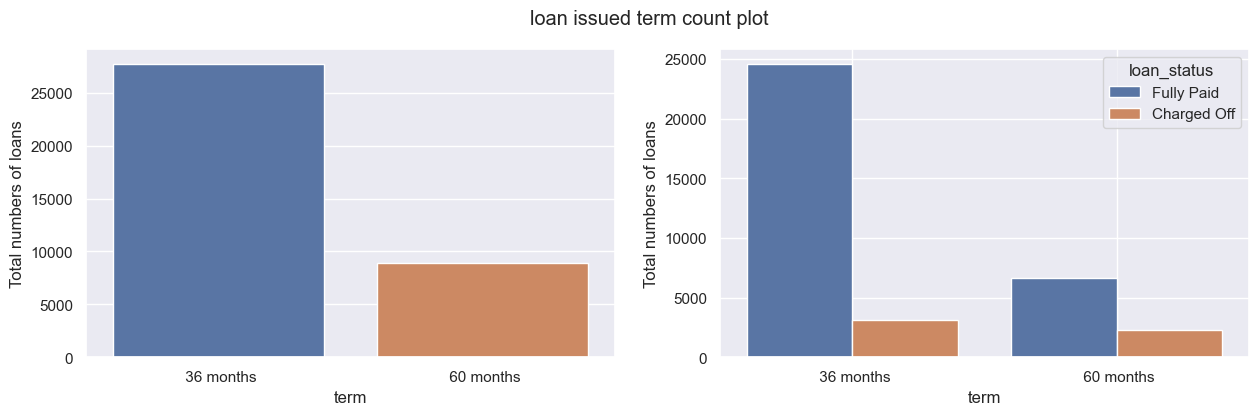

In [119]:
# count plot for term and
print(main_csv['term'].value_counts())
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)

sns.countplot(data=main_csv,x=main_csv['term'])
plt.ylabel('Total numbers of loans')

plt.subplot(1,2,2)

sns.countplot(data=main_csv,x='term',hue='loan_status')
plt.ylabel('Total numbers of loans')

plt.suptitle('loan issued term count plot')
plt.grid(True)
plt.show()

#### Insights

majority of borrowers taken loan for 36 months and most chances of charged off is taken loan for 60 months



### orderd categorical Data analsys

loan_status
purpose 
home ownership
state 
grade
subgrade

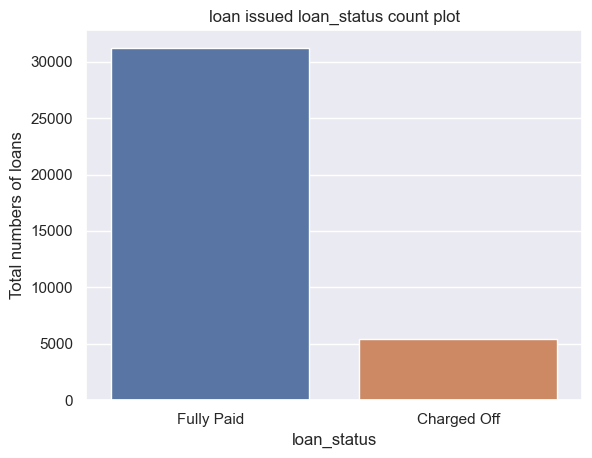

In [74]:
# count plot for loan_status and
sns.countplot(data=main_csv,x=main_csv['loan_status'])
plt.title('loan issued loan_status count plot')
plt.xlabel('loan_status')
plt.ylabel('Total numbers of loans')
plt.show()

#### Insights

More then 30000 persond fully paid the loan

and more then 5000 charged off

debt_consolidation    17304
credit_card           4783 
other                 3697 
home_improvement      2556 
major_purchase        2046 
small_business        1623 
car                   1448 
wedding               893  
medical               641  
moving                550  
vacation              365  
house                 338  
educational           312  
renewable_energy      95   
Name: purpose, dtype: int64


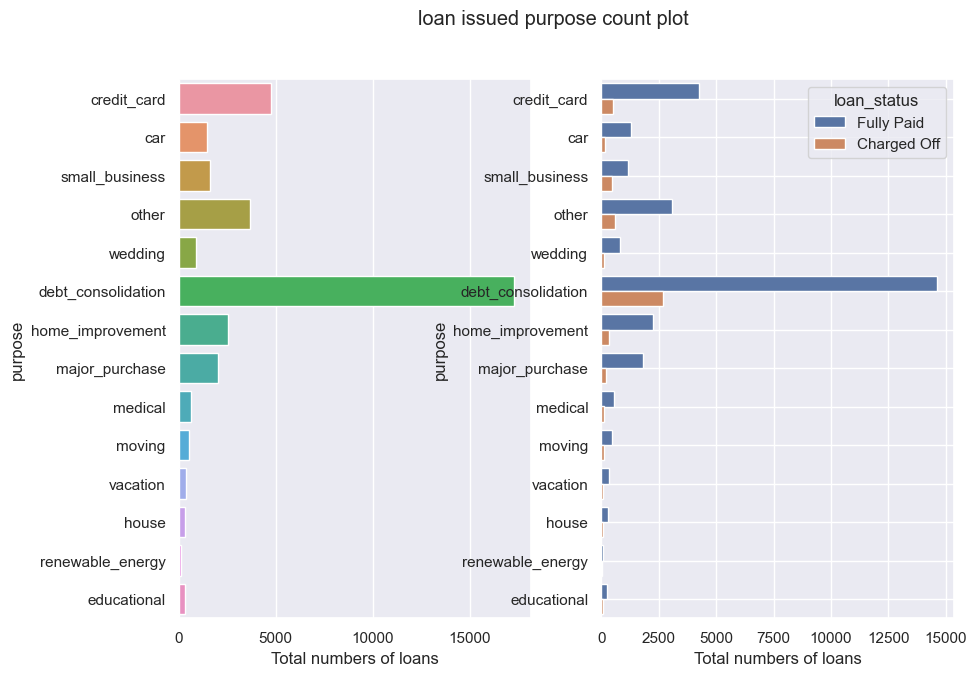

In [125]:
# count plot for purpose and

print(main_csv['purpose'].value_counts())
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)

sns.countplot(data=main_csv,y=main_csv['purpose'])
plt.xlabel('Total numbers of loans')

plt.subplot(1,2,2)

sns.countplot(data=main_csv,y='purpose',hue='loan_status')
plt.xlabel('Total numbers of loans')

plt.suptitle('loan issued purpose count plot')
plt.grid(True)
plt.show()


#### Insights

majority of borrowers loan apply for debt_consolation and paying bils of credi_card  

and majority of charged off have from debt_consolation

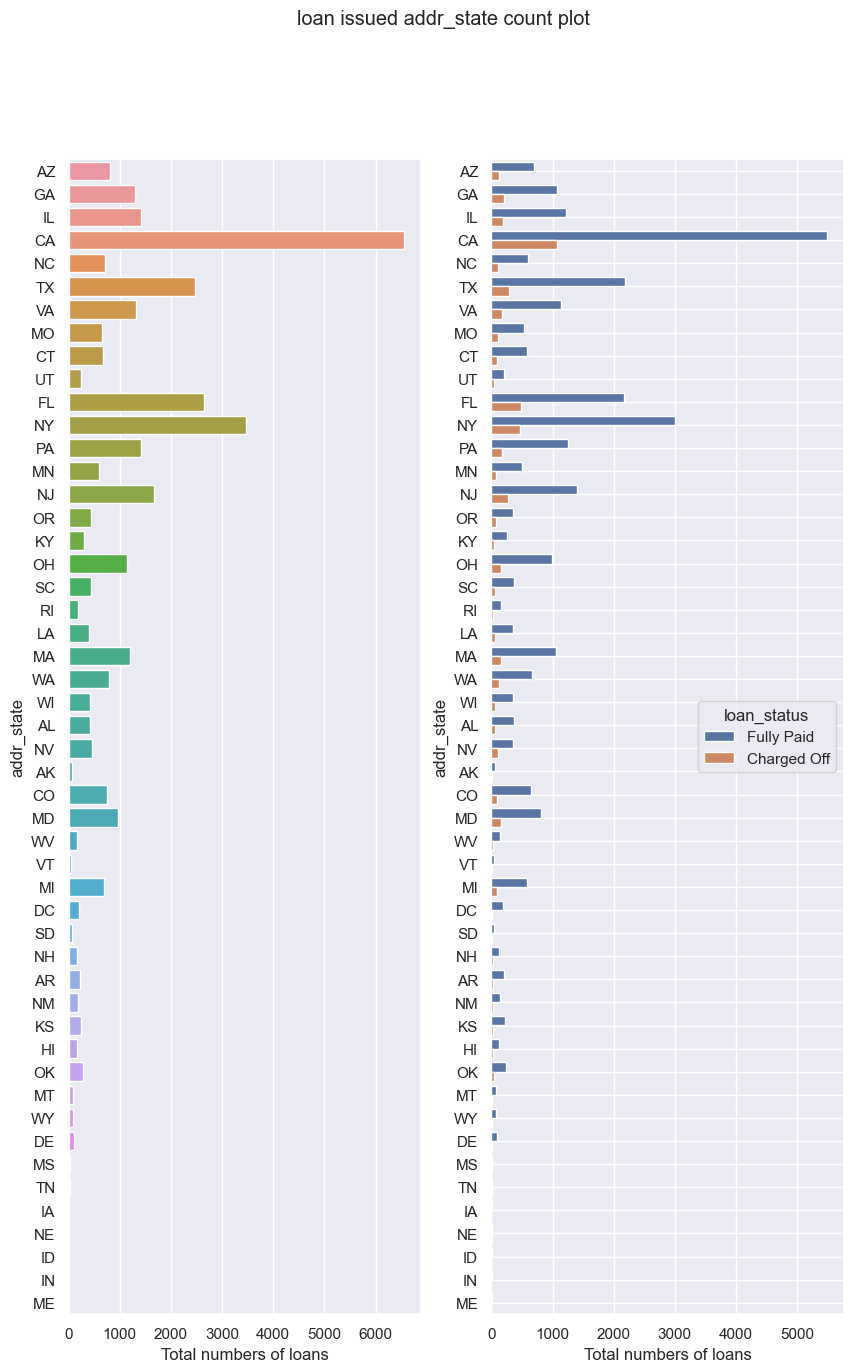

In [129]:
 # count plot for addr_state and

#print(main_csv['addr_state'].value_counts())
plt.figure(figsize=(10,15))
plt.subplot(1,2,1)

sns.countplot(data=main_csv,y=main_csv['addr_state'])
plt.xlabel('Total numbers of loans')

plt.subplot(1,2,2)

sns.countplot(data=main_csv,y='addr_state',hue='loan_status')
plt.xlabel('Total numbers of loans')

plt.suptitle('loan issued addr_state count plot')
plt.grid(True)
plt.show()


#### Insights

majority of borrowers belongs to large urban cities like california, new york, texas, florida and majority of charged off have from california, new yorketc.

RENT        18031
MORTGAGE    15675
OWN         2852 
OTHER       93   
Name: home_ownership, dtype: int64


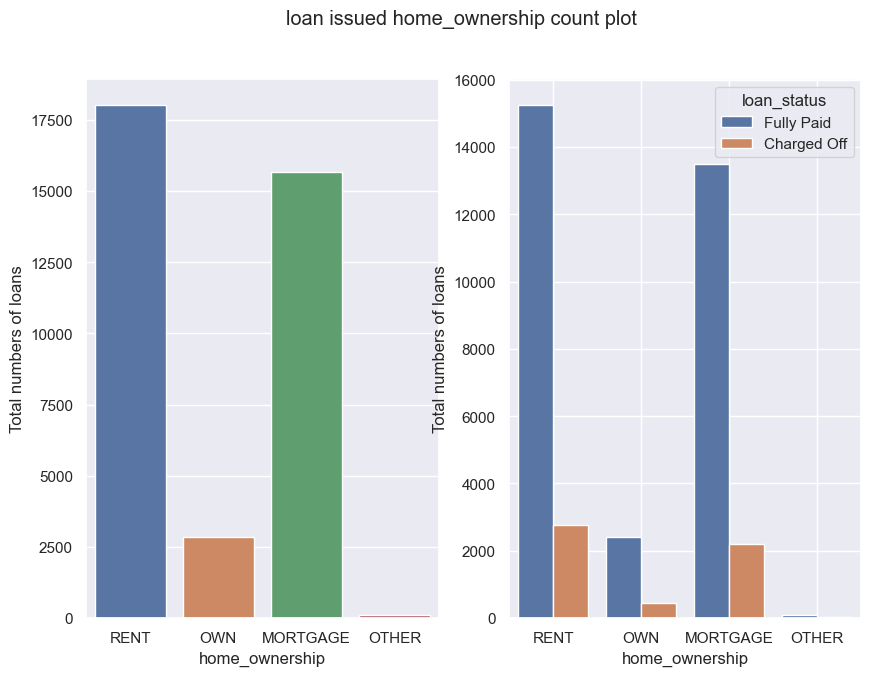

In [132]:
 # count plot for home_ownership and



print(main_csv['home_ownership'].value_counts())
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)

sns.countplot(data=main_csv,x=main_csv['home_ownership'])
plt.ylabel('Total numbers of loans')

plt.subplot(1,2,2)

sns.countplot(data=main_csv,x='home_ownership',hue='loan_status')
plt.ylabel('Total numbers of loans')

plt.suptitle('loan issued home_ownership count plot')
plt.grid(True)
plt.show()


#### Insights
Majority of pepoles taking loan is did't have ownership of house they coming from rent and Mortage category.

Charged Off loan status is also high for same catrgries (Rent and Mortage)

B    11095
A    9645 
C    7481 
D    4835 
E    2448 
F    886  
G    261  
Name: grade, dtype: int64


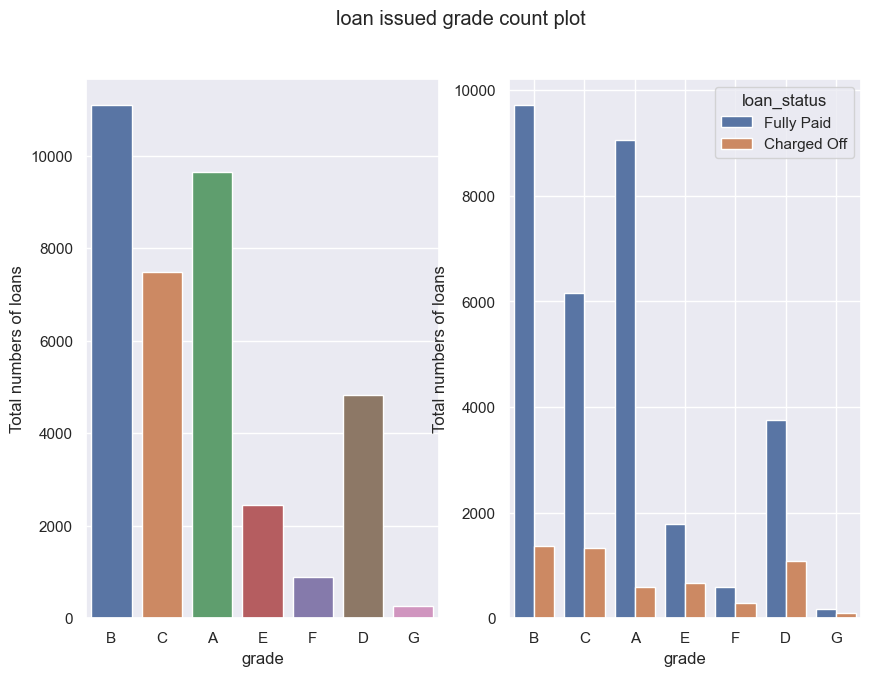

In [133]:
# count plot for grade and
print(main_csv['grade'].value_counts())
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)

sns.countplot(data=main_csv,x=main_csv['grade'])
plt.ylabel('Total numbers of loans')

plt.subplot(1,2,2)

sns.countplot(data=main_csv,x='grade',hue='loan_status')
plt.ylabel('Total numbers of loans')

plt.suptitle('loan issued grade count plot')
plt.grid(True)
plt.show()


#### Insights
we can say that most of them have taken loan is coming from grade B A C D E and F.

But charged Off loan status is high for grade  B C D and E.

A4    2749
B3    2654
A5    2599
B5    2492
B4    2333
C1    1964
B2    1899
C2    1847
A3    1748
B1    1717
A2    1451
C3    1419
D2    1223
C4    1155
A1    1098
C5    1096
D3    1064
D1    888 
D4    871 
D5    789 
E1    675 
E2    565 
E3    471 
E4    392 
E5    345 
F1    276 
F2    217 
F3    156 
F4    139 
F5    98  
G1    88  
G2    66  
G4    45  
G3    40  
G5    22  
Name: sub_grade, dtype: int64


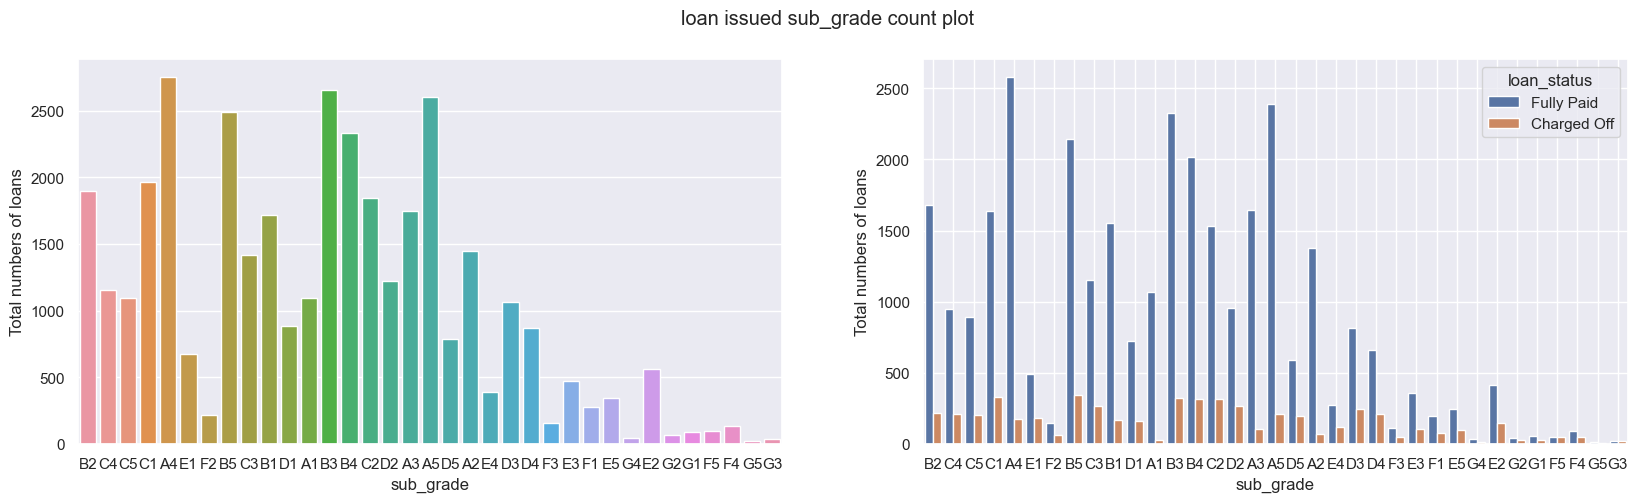

In [138]:
# count plot for sub_grade and
print(main_csv['sub_grade'].value_counts())
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)

sns.countplot(data=main_csv,x=main_csv['sub_grade'])
plt.ylabel('Total numbers of loans')

plt.subplot(1,2,2)

sns.countplot(data=main_csv,x='sub_grade',hue='loan_status')
plt.ylabel('Total numbers of loans')

plt.suptitle('loan issued sub_grade count plot')
plt.grid(True)
plt.show()


#### Insights
looking subgrade data, we can say that most of them have taken loan is coming under A4 A5 B4 B5, B3 B2 A3 A2 C1 C2 etc.
Charged Off loan status is also high for same sub-grades.

Not Verified       16277
Verified           11219
Source Verified    9155 
Name: verification_status, dtype: int64


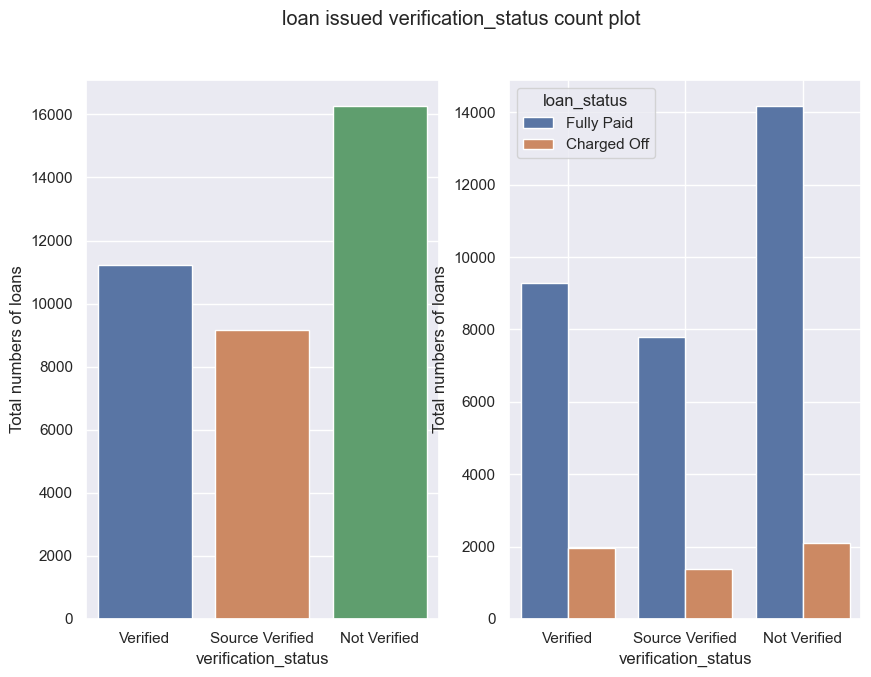

In [140]:
# count plot for verification_status and


print(main_csv['verification_status'].value_counts())
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)

sns.countplot(data=main_csv,x=main_csv['verification_status'])
plt.ylabel('Total numbers of loans')

plt.subplot(1,2,2)

sns.countplot(data=main_csv,x='verification_status',hue='loan_status')
plt.ylabel('Total numbers of loans')

plt.suptitle('loan issued verification_status count plot')
plt.grid(True)
plt.show()


#### Insights

mostly 50% borrowers verified or source verified and majority of chargedoff happen from not verified persons

creating new dataframe for chsrged_off 


In [164]:
charged_off_main_csv=main_csv.loc[main_csv['loan_status']=='Charged Off']

In [165]:
charged_off_main_csv.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
1   2500       2500         2500.0            60 months  15.27      
8   5600       5600         5600.0            60 months  21.28      
9   5375       5375         5350.0            60 months  12.69      
12  9000       9000         9000.0            36 months  13.49      
14  10000      10000        10000.0           36 months  10.65      

    installment grade sub_grade  emp_length home_ownership  annual_inc  \
1   59.83        C     C4        0.0         RENT           30000.0      
8   152.39       F     F2        4.0         OWN            40000.0      
9   121.45       B     B5        0.0         RENT           15000.0      
12  305.38       C     C1        0.0         RENT           30000.0      
14  325.74       B     B2        3.0         RENT           100000.0     

   verification_status    issue_d  loan_status             purpose addr_state  \
1   Source Verified    2011-12-01  Charged Off  car                 GA          
8   Source Verified    2011-12-01  Charged Off  small_business      CA          
9   Verified           2011-12-01  Charged Off  other               TX          
12  Source Verified    2011-12-01  Charged Off  debt_consolidation  VA          
14  Source Verified    2011-12-01  Charged Off  other               CA          

      dti  month  year loan_amnt_cats annual_inc_cats int_rate_cats dti_cats  
1   1.00   12     2011  0-7000         20000-40000     12.5-16       0-5      
8   5.55   12     2011  0-7000         20000-40000     NaN           05-10    
9   18.08  12     2011  0-7000         0-20000         12.5-16       15-20    
12  10.08  12     2011  7000-14000     20000-40000     12.5-16       10-15    
14  7.06   12     2011  7000-14000     80000 +         10-13         05-10

In [166]:
charged_off_main_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5418 entries, 1 to 39678
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            5418 non-null   int64         
 1   funded_amnt          5418 non-null   int64         
 2   funded_amnt_inv      5418 non-null   float64       
 3   term                 5418 non-null   object        
 4   int_rate             5418 non-null   float64       
 5   installment          5418 non-null   float64       
 6   grade                5418 non-null   object        
 7   sub_grade            5418 non-null   object        
 8   emp_length           5193 non-null   float64       
 9   home_ownership       5418 non-null   object        
 10  annual_inc           5418 non-null   float64       
 11  verification_status  5418 non-null   object        
 12  issue_d              5418 non-null   datetime64[ns]
 13  loan_status          5418 non-nu

In [167]:
# Derived columns
main_csv['loan_amnt_cats'] = pd.cut(main_csv['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
main_csv['annual_inc_cats'] = pd.cut(main_csv['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
main_csv['int_rate_cats'] = pd.cut(main_csv['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into buckets for bivariate analysis.
main_csv['dti_cats'] = pd.cut(main_csv['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

In [168]:
main_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36651 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            36651 non-null  int64         
 1   funded_amnt          36651 non-null  int64         
 2   funded_amnt_inv      36651 non-null  float64       
 3   term                 36651 non-null  object        
 4   int_rate             36651 non-null  float64       
 5   installment          36651 non-null  float64       
 6   grade                36651 non-null  object        
 7   sub_grade            36651 non-null  object        
 8   emp_length           35637 non-null  float64       
 9   home_ownership       36651 non-null  object        
 10  annual_inc           36651 non-null  float64       
 11  verification_status  36651 non-null  object        
 12  issue_d              36651 non-null  datetime64[ns]
 13  loan_status          36651 non-

In [169]:
charged_off_main_csv=main_csv.loc[main_csv['loan_status']=='Charged Off']
charged_off_main_csv.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
1   2500       2500         2500.0            60 months  15.27      
8   5600       5600         5600.0            60 months  21.28      
9   5375       5375         5350.0            60 months  12.69      
12  9000       9000         9000.0            36 months  13.49      
14  10000      10000        10000.0           36 months  10.65      

    installment grade sub_grade  emp_length home_ownership  annual_inc  \
1   59.83        C     C4        0.0         RENT           30000.0      
8   152.39       F     F2        4.0         OWN            40000.0      
9   121.45       B     B5        0.0         RENT           15000.0      
12  305.38       C     C1        0.0         RENT           30000.0      
14  325.74       B     B2        3.0         RENT           100000.0     

   verification_status    issue_d  loan_status             purpose addr_state  \
1   Source Verified    2011-12-01  Charged Off  car                 GA          
8   Source Verified    2011-12-01  Charged Off  small_business      CA          
9   Verified           2011-12-01  Charged Off  other               TX          
12  Source Verified    2011-12-01  Charged Off  debt_consolidation  VA          
14  Source Verified    2011-12-01  Charged Off  other               CA          

      dti  month  year loan_amnt_cats annual_inc_cats int_rate_cats dti_cats  
1   1.00   12     2011  0-7000         20000-40000     12.5-16       0-5      
8   5.55   12     2011  0-7000         20000-40000     NaN           05-10    
9   18.08  12     2011  0-7000         0-20000         12.5-16       15-20    
12  10.08  12     2011  7000-14000     20000-40000     12.5-16       10-15    
14  7.06   12     2011  7000-14000     80000 +         10-13         05-10

In [170]:
charged_off_main_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5418 entries, 1 to 39678
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            5418 non-null   int64         
 1   funded_amnt          5418 non-null   int64         
 2   funded_amnt_inv      5418 non-null   float64       
 3   term                 5418 non-null   object        
 4   int_rate             5418 non-null   float64       
 5   installment          5418 non-null   float64       
 6   grade                5418 non-null   object        
 7   sub_grade            5418 non-null   object        
 8   emp_length           5193 non-null   float64       
 9   home_ownership       5418 non-null   object        
 10  annual_inc           5418 non-null   float64       
 11  verification_status  5418 non-null   object        
 12  issue_d              5418 non-null   datetime64[ns]
 13  loan_status          5418 non-nu

# univariate Segmented categorial analysis  
doing Analysis with new data frame  charged_off data taken

<Figure size 2500x500 with 0 Axes>

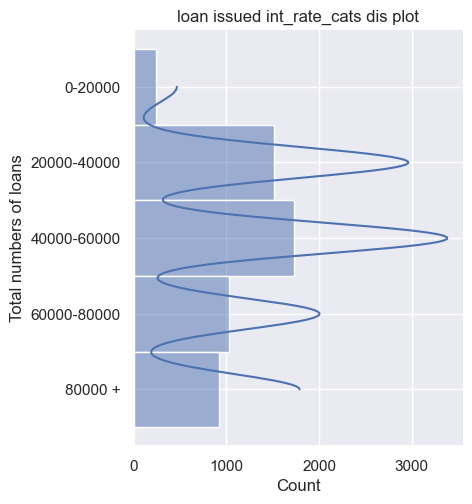

In [199]:
plt.figure(figsize=(25,5))
sns.displot(data=charged_off_main_csv,y=charged_off_main_csv['annual_inc_cats'],bins=5,kde=True)
plt.title('loan issued int_rate_cats dis plot')
plt.ylabel('Total numbers of loans')
plt.grid(True);
plt.show()


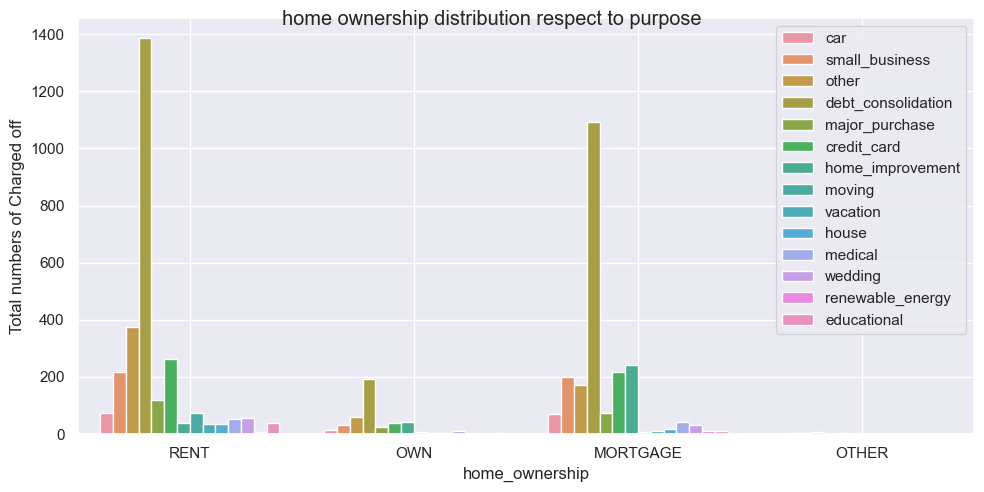

In [171]:

plt.figure(figsize=(10,5))
sns.countplot(data=charged_off_main_csv,x='home_ownership',hue='purpose')
plt.ylabel('Total numbers of Charged off')
plt.tight_layout()
plt.suptitle('home ownership distribution respect to purpose')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

#### Insights 

most of chagrged off coming from who taking loan for debt_consolation and renting house .

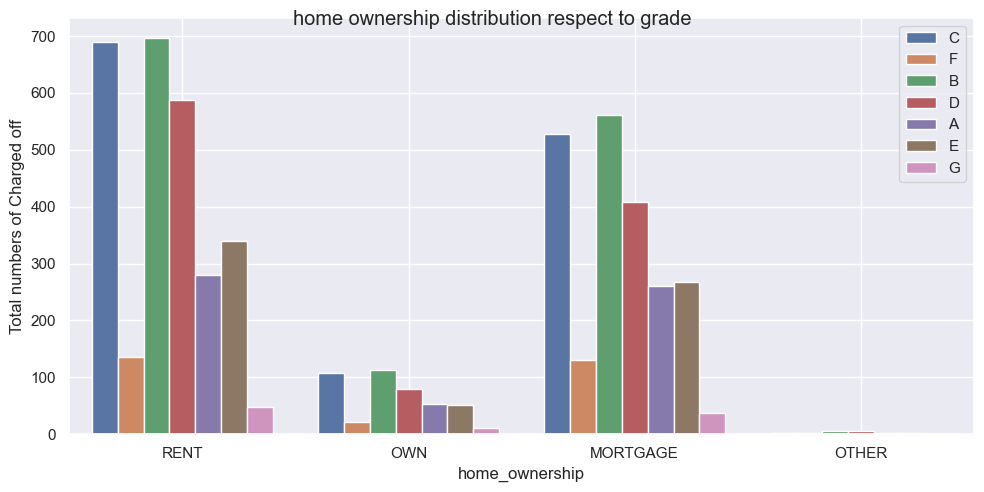

In [180]:
plt.figure(figsize=(10,5))
sns.countplot(data=charged_off_main_csv,x='home_ownership',hue='grade')
plt.ylabel('Total numbers of Charged off')
plt.tight_layout()
plt.suptitle('home ownership distribution respect to grade')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

#### Insights

Persons who leaving in rent and grade having B C D are have most no. of Charged Off

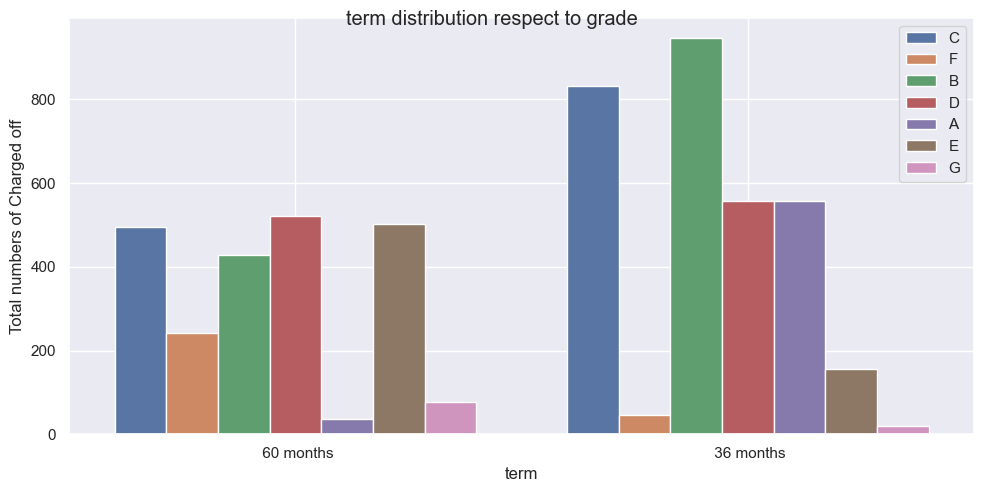

In [173]:
plt.figure(figsize=(10,5))
sns.countplot(data=charged_off_main_csv,x='term',hue='grade')
plt.ylabel('Total numbers of Charged off')
plt.tight_layout()
plt.suptitle('term distribution respect to grade')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()


#### Insights

mostly charged off for 36 months grade B and C


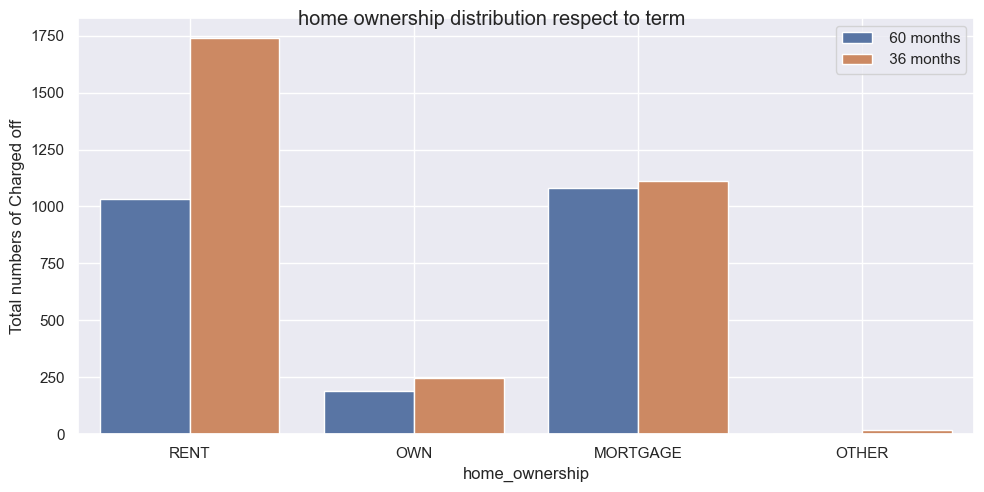

In [174]:
plt.figure(figsize=(10,5))
sns.countplot(data=charged_off_main_csv,x='home_ownership',hue='term')
plt.ylabel('Total numbers of Charged off')
plt.tight_layout()
plt.suptitle('home ownership distribution respect to term')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

#### Insights


Mostly charged off for rent 36 monts and leaving on rent

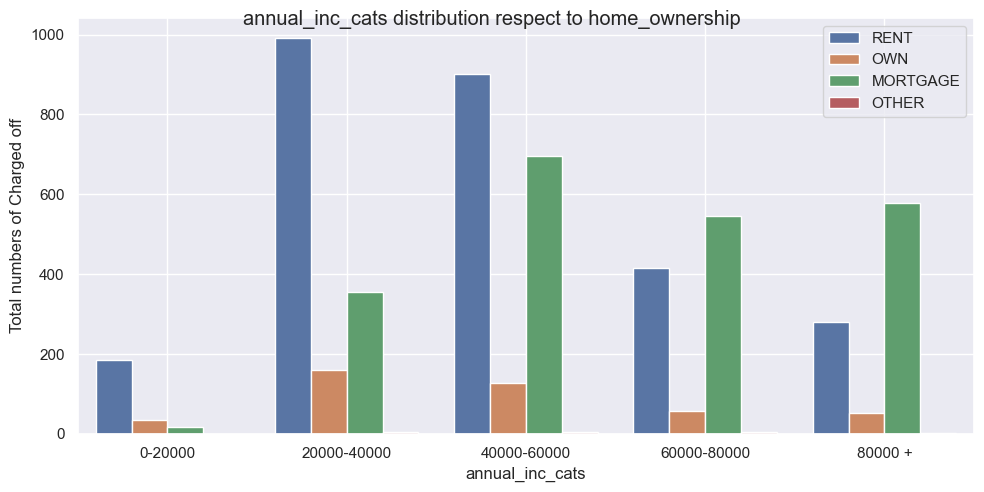

In [181]:
plt.figure(figsize=(10,5))
sns.countplot(data=charged_off_main_csv,x='annual_inc_cats',hue='home_ownership')
plt.ylabel('Total numbers of Charged off')
plt.tight_layout()
plt.suptitle('annual_inc_cats distribution respect to home_ownership')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()


#### Insights

No. of pepoles Charged _off which annual_income have 20k to 60k which on living on rent 

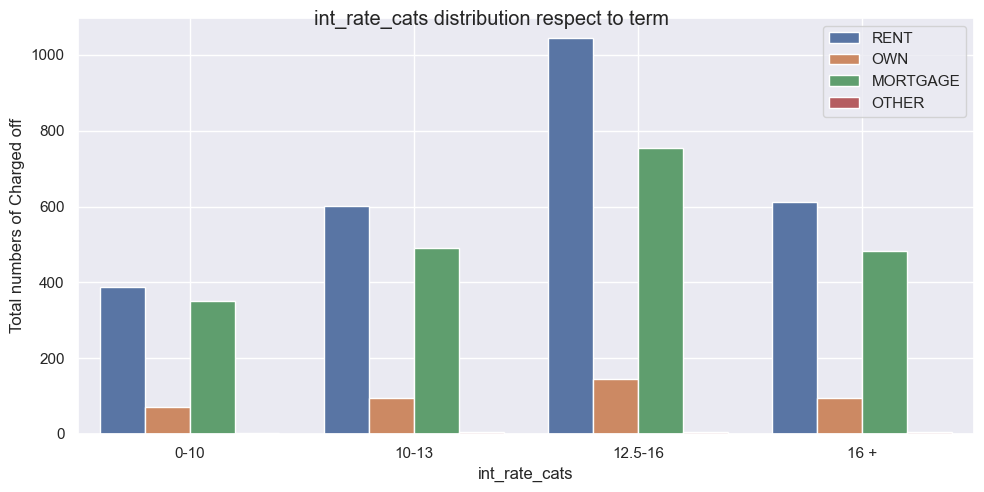

In [201]:
plt.figure(figsize=(10,5))
sns.countplot(data=charged_off_main_csv,x='int_rate_cats',hue='home_ownership')
plt.ylabel('Total numbers of Charged off')
plt.tight_layout()
plt.suptitle('int_rate_cats distribution respect to term')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

#### Insights 

No. of majority pepole charged_off which one taking lone on 12.4 to 16 interest rate and leaving on rent.

## BIvariate Analysis

taking loan amont with all varables

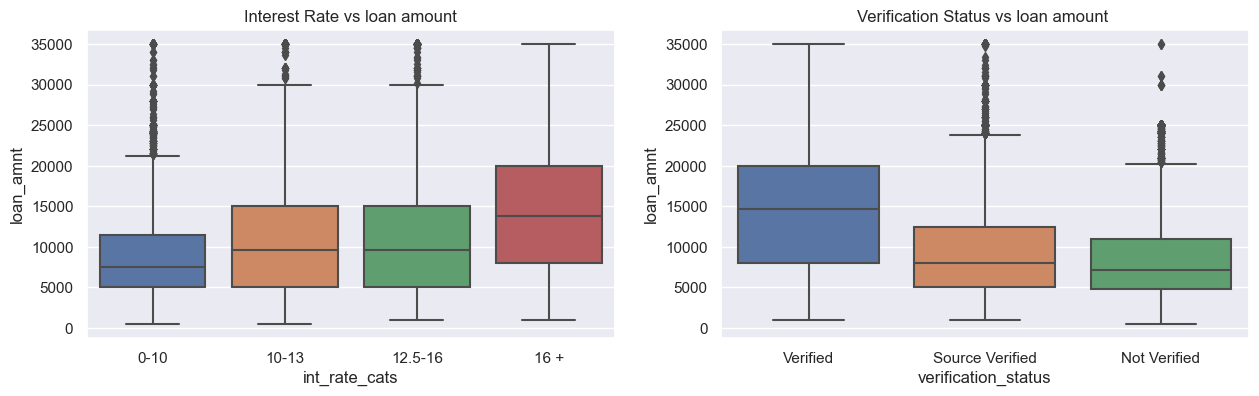

In [239]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="int_rate_cats", y="loan_amnt", data=main_csv)
plt.title("Interest Rate vs loan amount")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="loan_amnt", data=main_csv)
plt.title("Verification Status vs loan amount ")
plt.show()

#### Insights 

1. Interest rate have higher on higher loan amount
2. Verified pepole got higher loan amount respect to others 

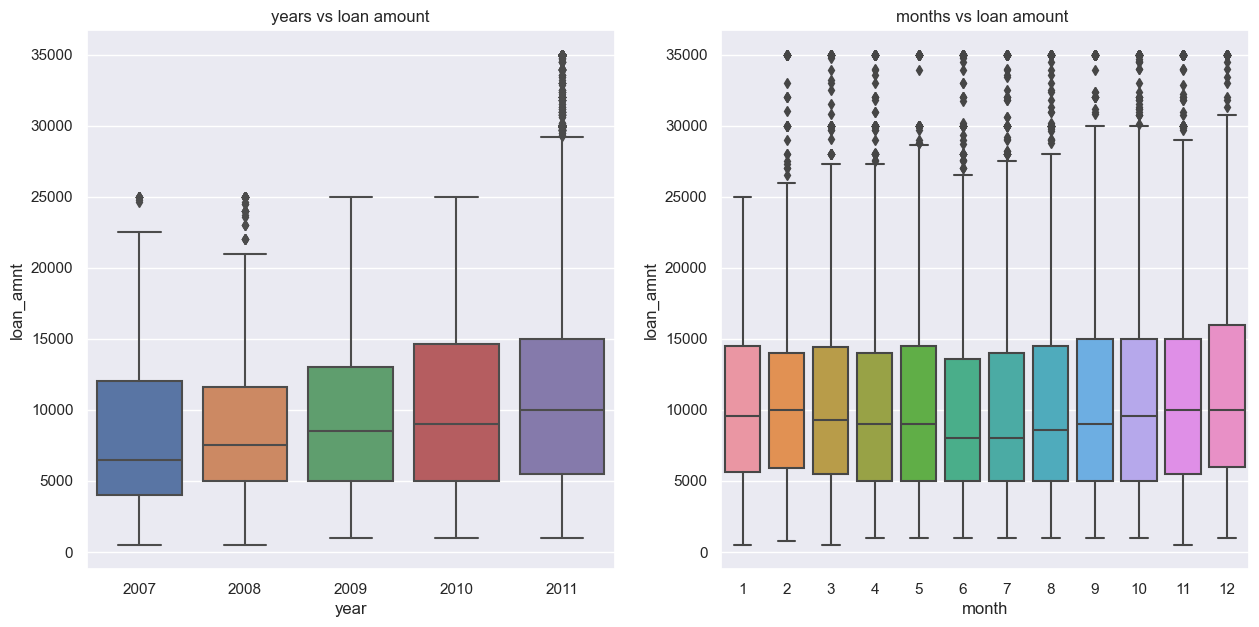

In [250]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(x="year", y="loan_amnt", data=main_csv)
plt.title("years vs loan amount")

plt.subplot(1,2,2)
sns.boxplot(x="month", y="loan_amnt", data=main_csv)
plt.title("months vs loan amount ")


plt.show()

#### Insights 

1. loan amount increasing year by year
2. last of the month borrower geting higher loan amount

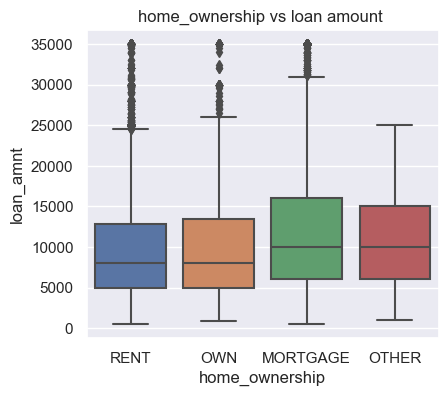

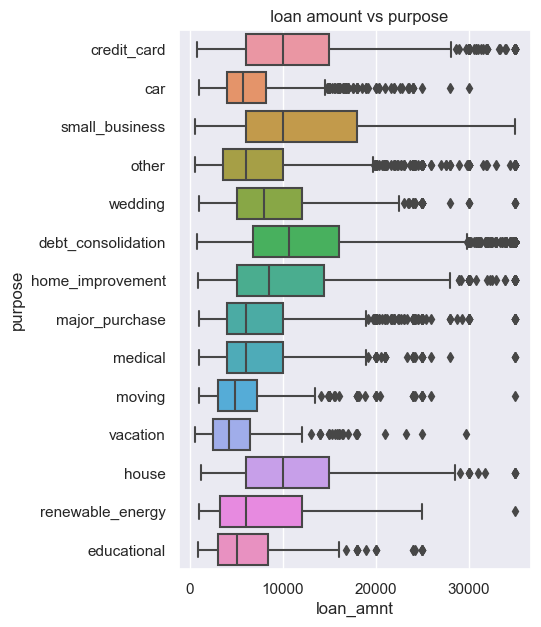

In [268]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x="home_ownership", y="loan_amnt", data=main_csv)
plt.title("home_ownership vs loan amount ")
plt.figure(figsize=(10,7))
plt.subplot(1,2,2)
sns.boxplot(y="purpose", x="loan_amnt", data=main_csv)
plt.title("  loan amount vs purpose")
plt.show()

#### Insights 

1. mortage persons are get higher amount respect to other categories of home ownership.
2. small business alloted higher loan amount respect to others

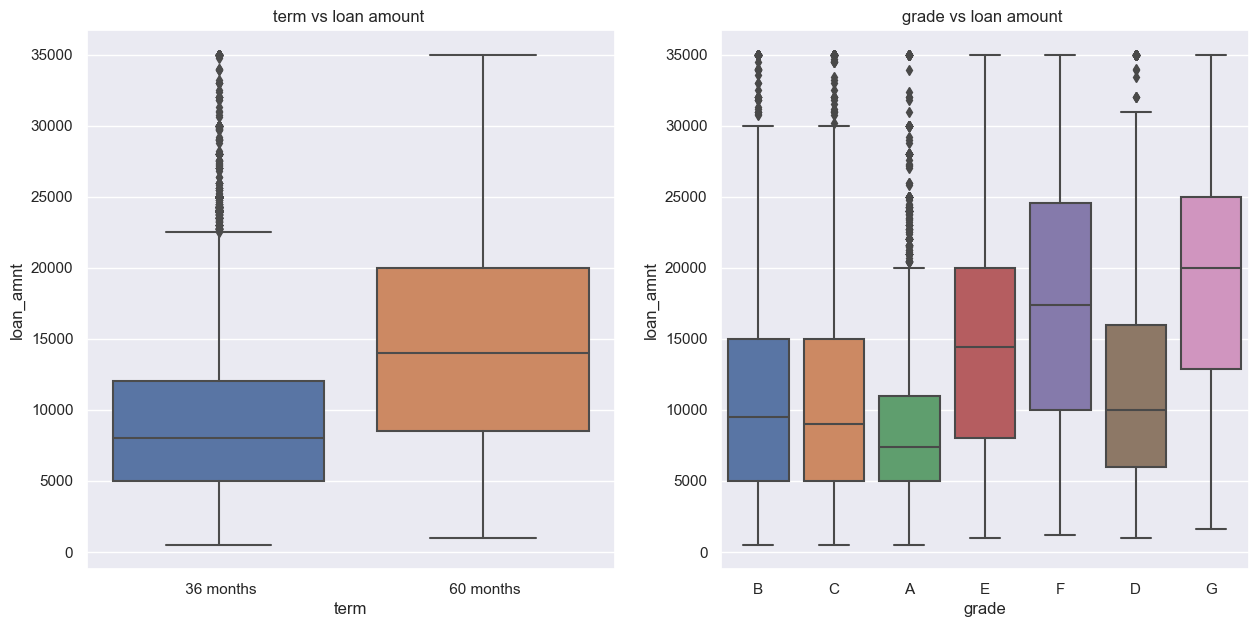

In [264]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="loan_amnt", data=main_csv)
plt.title("term vs loan amount ")

plt.subplot(1,2,2)
sns.boxplot(x="grade", y="loan_amnt", data=main_csv)
plt.title("grade vs loan amount ")


plt.show()

#### Insights 

1. Persons who applied loan for 60 month term got hiagher loan amount
2. Grade G and F got higher loan amount.

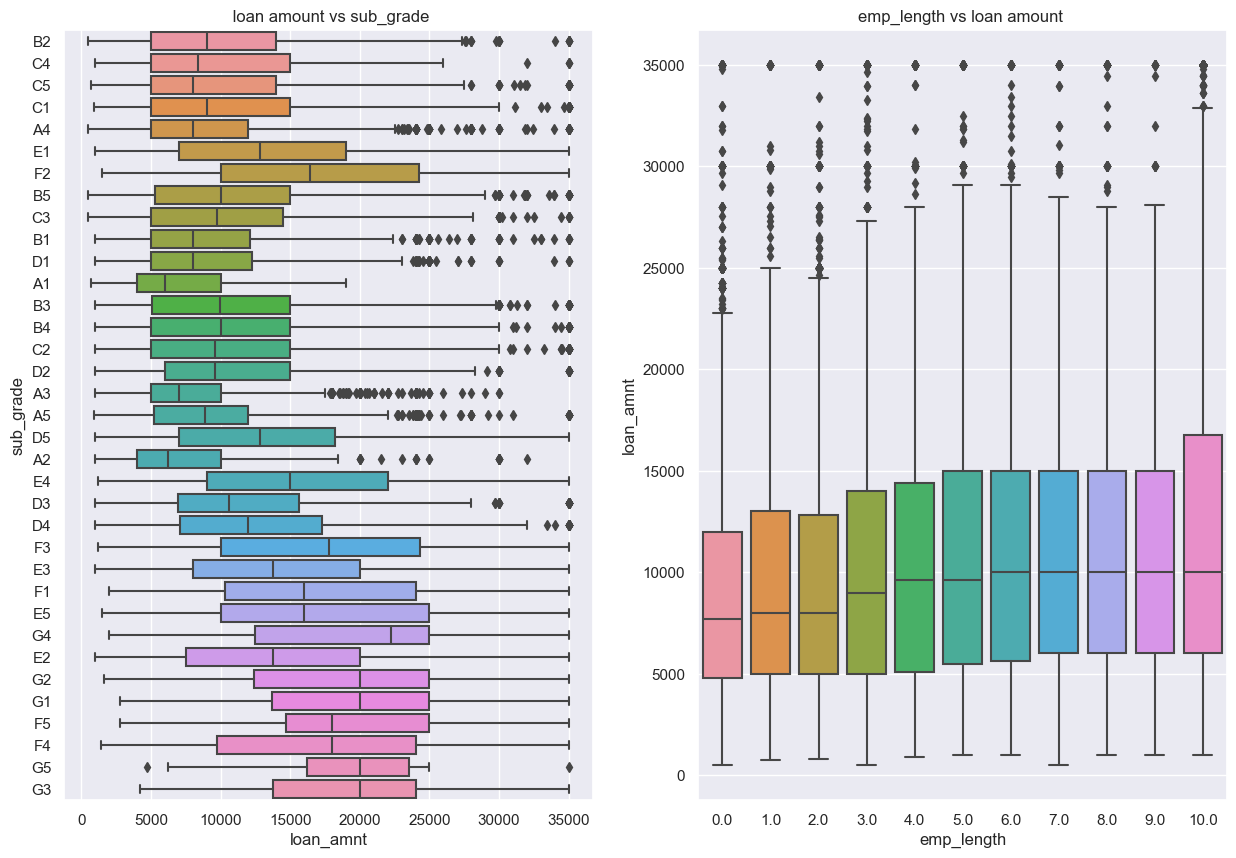

In [269]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
sns.boxplot(y="sub_grade", x="loan_amnt", data=main_csv)
plt.title(" loan amount vs sub_grade")



plt.subplot(1,2,2)
sns.boxplot(x="emp_length", y="loan_amnt", data=main_csv)
plt.title("emp_length vs loan amount ")


plt.show()


#### Insights 

1. Sub Grade G and F got higher loan amount its following Grades
2. Persons who have more then 10 years experience got higher loan amount

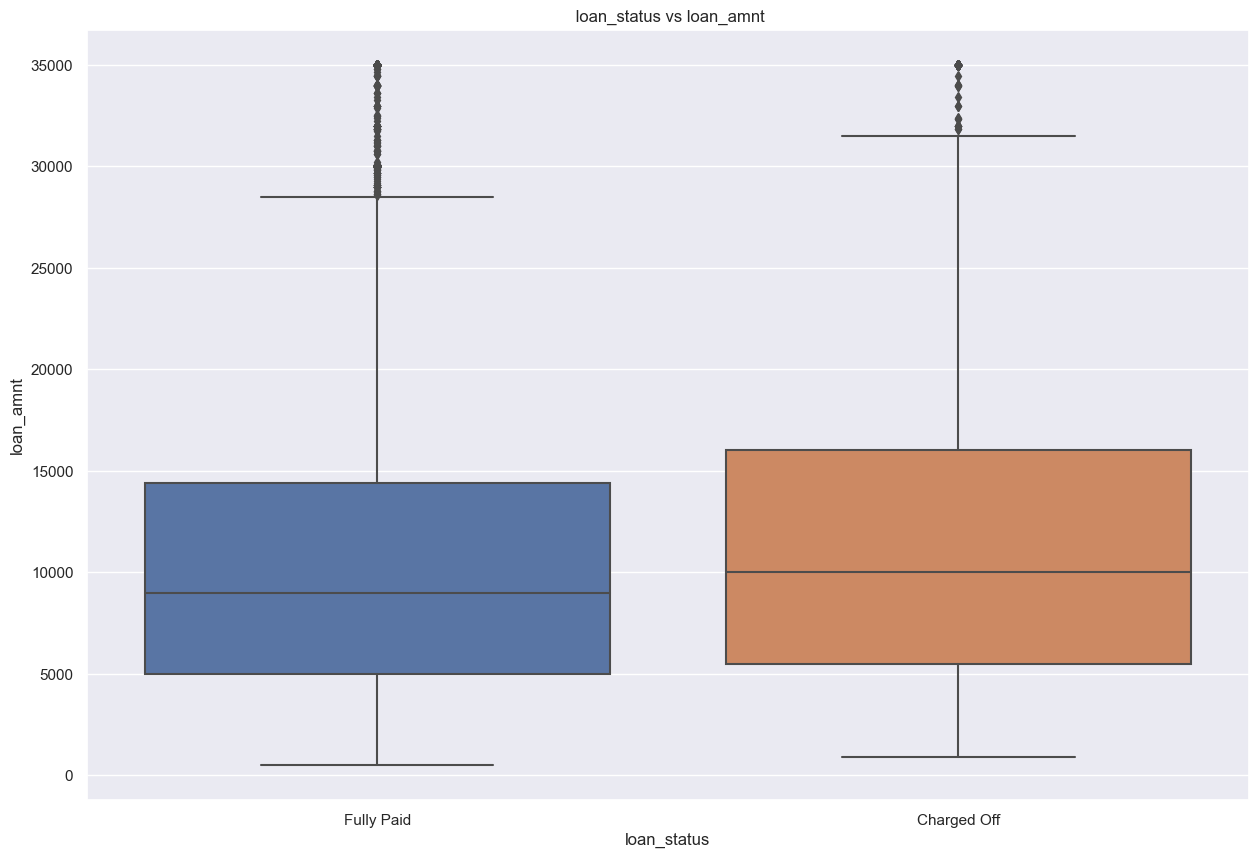

In [274]:
plt.figure(figsize=(15,10))

plt.subplot(1,1,1)
sns.boxplot(x="loan_status", y="loan_amnt", data=main_csv)
plt.title(" loan_status vs loan_amnt")





plt.show()


#### Insights 

1. Boroworrs who got charged_off alloted higher loan amount

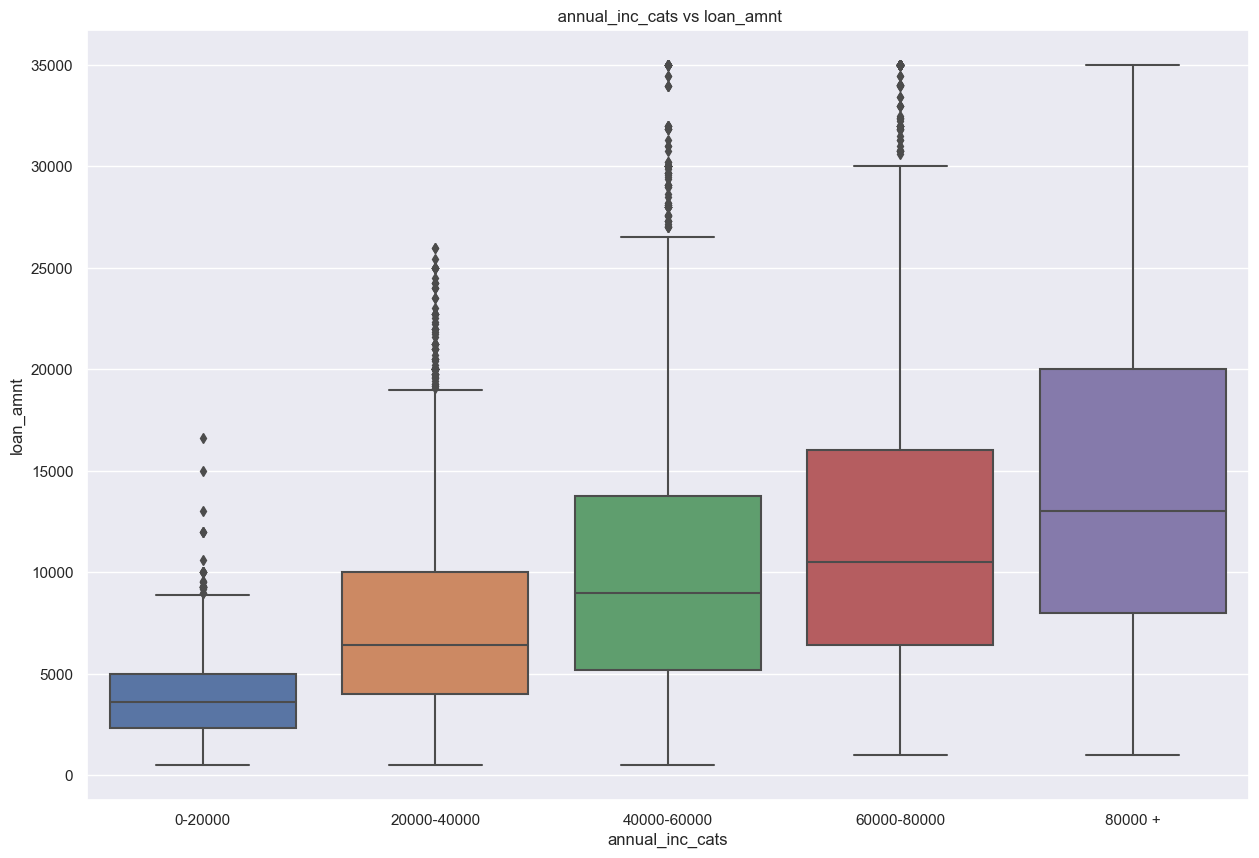

In [275]:
plt.figure(figsize=(15,10))

plt.subplot(1,1,1)
sns.boxplot(x="annual_inc_cats", y="loan_amnt", data=main_csv)
plt.title(" annual_inc_cats vs loan_amnt")





plt.show()

#### Insights 

1. Boroworrs which one have higher annial income got alloted higher loan amount

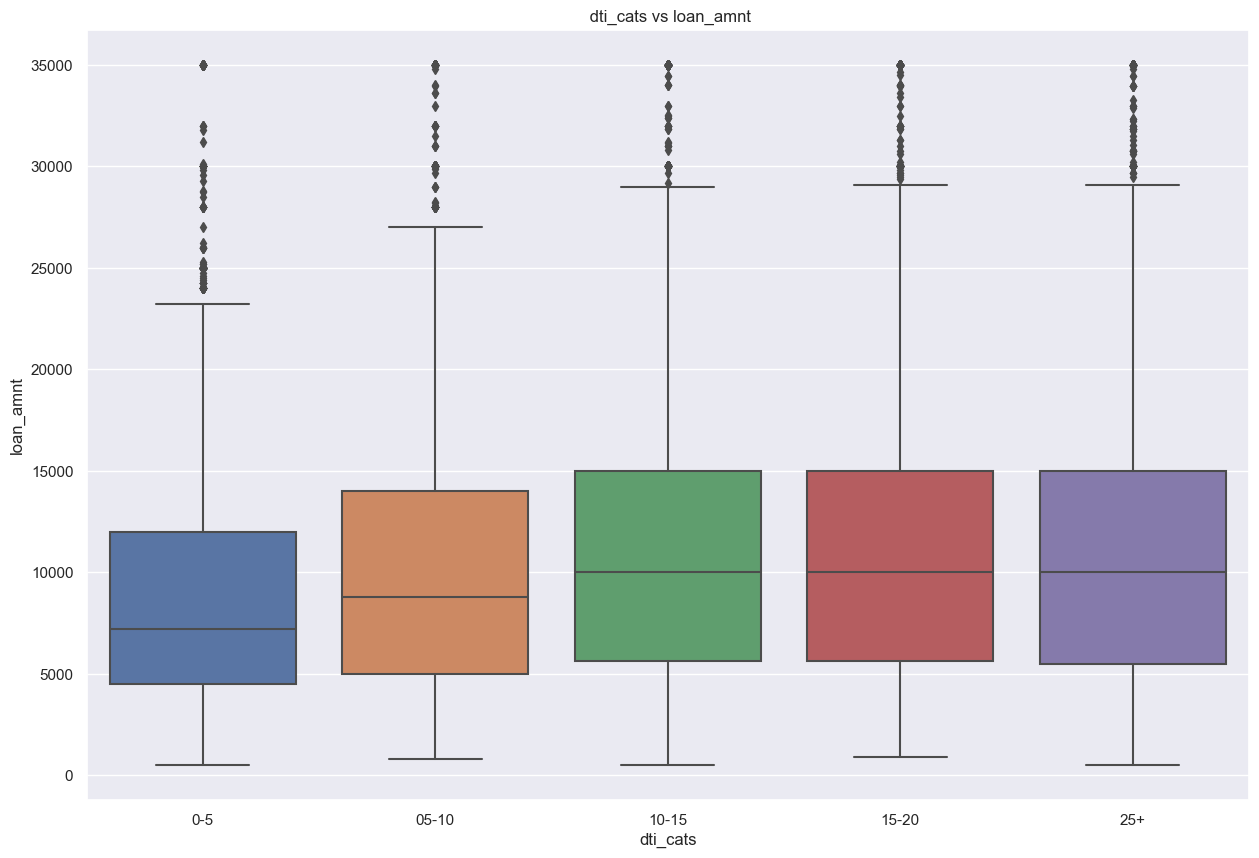

In [276]:
plt.figure(figsize=(15,10))

plt.subplot(1,1,1)
sns.boxplot(x="dti_cats", y="loan_amnt", data=main_csv)
plt.title(" dti_cats vs loan_amnt")





plt.show()

#### Insights 

1. Boroworrs which one have higher dti rate got alloted higher loan amount

In [240]:
main_csv.columns


Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'month', 'year', 'loan_amnt_cats',
       'annual_inc_cats', 'int_rate_cats', 'dti_cats'],
      dtype='object')

#### Bivariate Analsys part 2

Now doing analysis with charged_off prportion with each variables

In [323]:
# Derived columns
purpose_vs_loan_status = main_csv.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan_status['Total'] = purpose_vs_loan_status['Charged Off'] + purpose_vs_loan_status['Fully Paid'] 
purpose_vs_loan_status['Chargedoff_Proportion'] = purpose_vs_loan_status['Charged Off'] / purpose_vs_loan_status['Total']

In [282]:
purpose_vs_loan_status

loan_status             purpose  Charged Off  Fully Paid  Total  \
0            car                 159          1289        1448    
1            credit_card         519          4264        4783    
2            debt_consolidation  2677         14627       17304   
3            educational         54           258         312     
4            home_improvement    322          2234        2556    
5            house               55           283         338     
6            major_purchase      217          1829        2046    
7            medical             104          537         641     
8            moving              90           460         550     
9            other               605          3092        3697    
10           renewable_energy    18           77          95      
11           small_business      454          1169        1623    
12           vacation            52           313         365     
13           wedding             92           801         893     

loan_status  Chargedoff_Proportion  
0            0.109807               
1            0.108509               
2            0.154704               
3            0.173077               
4            0.125978               
5            0.162722               
6            0.106061               
7            0.162246               
8            0.163636               
9            0.163646               
10           0.189474               
11           0.279729               
12           0.142466               
13           0.103024

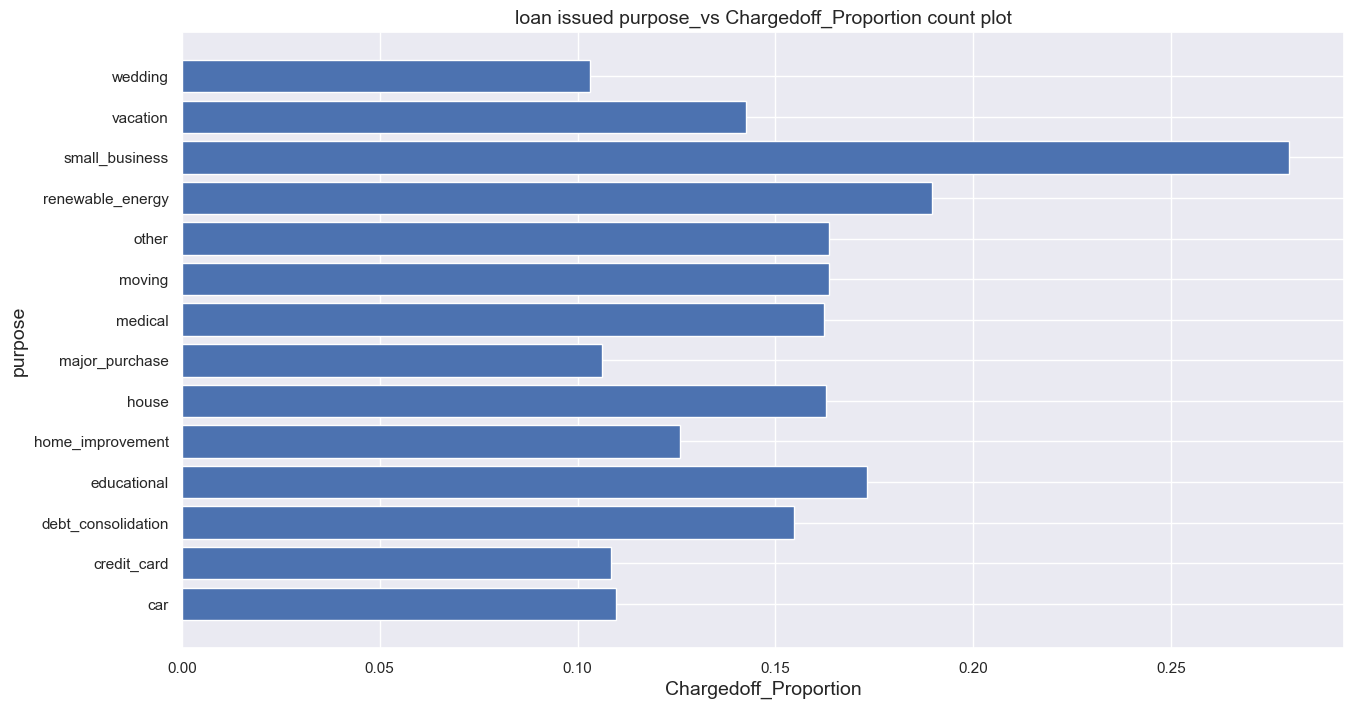

In [312]:
plt.figure(figsize=(15,8))
plt.barh(y=purpose_vs_loan_status['purpose'],width=purpose_vs_loan_status['Chargedoff_Proportion'],data=purpose_vs_loan_status)
plt.title('loan issued purpose_vs Chargedoff_Proportion count plot',fontsize=14)
plt.ylabel('purpose',fontsize=14)
plt.xlabel('Chargedoff_Proportion',fontsize=14)
plt.grid(True)
plt.show()

#### Insights 

1. Boroworrs which one taking loan for small business having 27.97% chances of charged_off

2.  Boroworrs which one taking loan for wedding, major_purchases and car have low risk of charged_off.

In [325]:
# Derived columns
annual_inc_cats_vs_loan_status = main_csv.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
annual_inc_cats_vs_loan_status['Total'] = annual_inc_cats_vs_loan_status['Charged Off'] + annual_inc_cats_vs_loan_status['Fully Paid'] 
annual_inc_cats_vs_loan_status['Chargedoff_Proportion'] = annual_inc_cats_vs_loan_status['Charged Off'] / annual_inc_cats_vs_loan_status['Total']
annual_inc_cats_vs_loan_status

loan_status annual_inc_cats  Charged Off  Fully Paid  Total  \
0            0-20000         237          943         1180    
1            20000-40000     1514         7003        8517    
2            40000-60000     1729         9534        11263   
3            60000-80000     1024         6597        7621    
4            80000 +         914          7156        8070    

loan_status  Chargedoff_Proportion  
0            0.200847               
1            0.177762               
2            0.153511               
3            0.134366               
4            0.113259

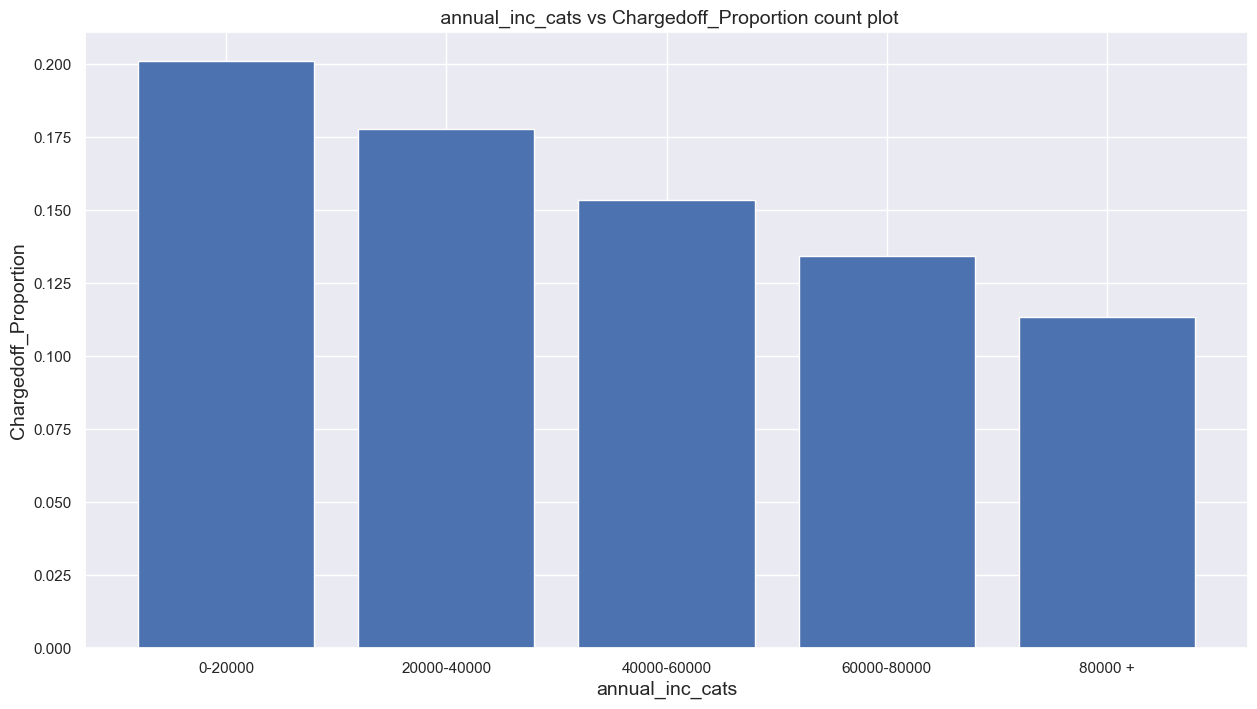

In [313]:
plt.figure(figsize=(15,8))
plt.bar(x=annual_inc_cats_vs_loan_status['annual_inc_cats'],height=annual_inc_cats_vs_loan_status['Chargedoff_Proportion'],data=annual_inc_cats_vs_loan_status)
plt.title(' annual_inc_cats vs Chargedoff_Proportion count plot',fontsize=14)
plt.xlabel('annual_inc_cats',fontsize=14)
plt.ylabel('Chargedoff_Proportion',fontsize=14)
plt.grid(True)
plt.show()

#### Insights 

1. Boroworrs which one taking loan have lower income (0 to 20K) Have 20% risk of charged off



In [326]:
# Derived columns
loan_amnt_vs_loan_status = main_csv.groupby(['loan_amnt_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
loan_amnt_vs_loan_status['Total'] = loan_amnt_vs_loan_status['Charged Off'] + loan_amnt_vs_loan_status['Fully Paid'] 
loan_amnt_vs_loan_status['Chargedoff_Proportion'] = loan_amnt_vs_loan_status['Charged Off'] / loan_amnt_vs_loan_status['Total']
loan_amnt_vs_loan_status

loan_status loan_amnt_cats  Charged Off  Fully Paid  Total  \
0            0-7000         1864         12186       14050   
1            7000-14000     1743         11070       12813   
2            14000-21000    1110         5450        6560    
3            21000-28000    480          1890        2370    
4            28000 +        221          637         858     

loan_status  Chargedoff_Proportion  
0            0.132669               
1            0.136034               
2            0.169207               
3            0.202532               
4            0.257576

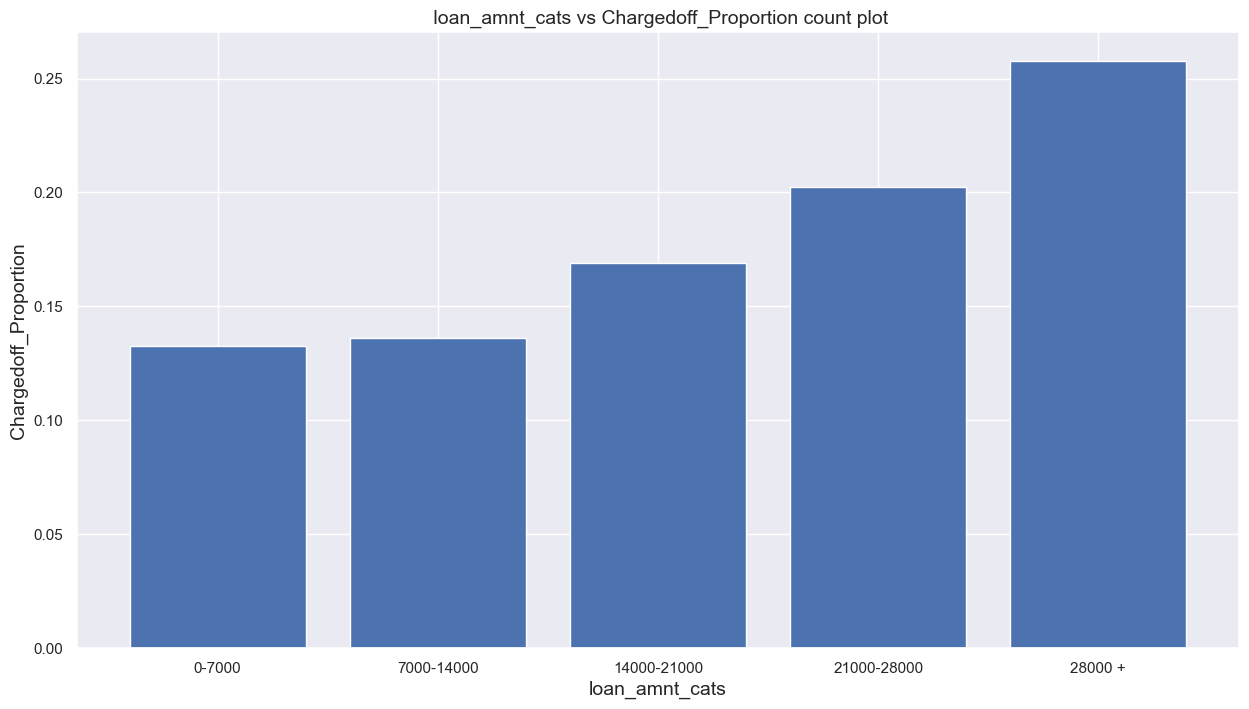

In [318]:
plt.figure(figsize=(15,8))
plt.bar(x=loan_amnt_vs_loan_status['loan_amnt_cats'],height=loan_amnt_vs_loan_status['Chargedoff_Proportion'],data=loan_amnt_vs_loan_status)
plt.title(' loan_amnt_cats vs Chargedoff_Proportion count plot',fontsize=14)
plt.xlabel('loan_amnt_cats',fontsize=14)
plt.ylabel('Chargedoff_Proportion',fontsize=14)
plt.grid(True)
plt.show()

#### Insights 

1. Boroworrs which one taking loan of higher amount (more then 28K) have 25.75% of charged_off

2.  Boroworrs which one taking loan of less amount(0 to 14K)have less risk of charged_off

In [327]:
# Derived columns
addr_state_vs_loan_status = main_csv.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan_status['Total'] = addr_state_vs_loan_status['Charged Off'] + addr_state_vs_loan_status['Fully Paid'] 
addr_state_vs_loan_status['Chargedoff_Proportion'] = addr_state_vs_loan_status['Charged Off'] / addr_state_vs_loan_status['Total']
addr_state_vs_loan_status

loan_status addr_state  Charged Off  Fully Paid   Total  Chargedoff_Proportion
0            AK         13.0         58.0        71.0    0.183099             
1            AL         52.0         371.0       423.0   0.122931             
2            AR         26.0         203.0       229.0   0.113537             
3            AZ         117.0        694.0       811.0   0.144266             
4            CA         1073.0       5487.0      6560.0  0.163567             
5            CO         96.0         645.0       741.0   0.129555             
6            CT         91.0         581.0       672.0   0.135417             
7            DC         13.0         182.0       195.0   0.066667             
8            DE         12.0         97.0        109.0   0.110092             
9            FL         485.0        2167.0      2652.0  0.182881             
10           GA         208.0        1080.0      1288.0  0.161491             
11           HI         28.0         132.0       160.0   0.175000             
12           IA         0.0          5.0         5.0     0.000000             
13           ID         1.0          4.0         5.0     0.200000             
14           IL         192.0        1214.0      1406.0  0.136558             
15           IN         0.0          9.0         9.0     0.000000             
16           KS         30.0         215.0       245.0   0.122449             
17           KY         45.0         259.0       304.0   0.148026             
18           LA         51.0         350.0       401.0   0.127182             
19           MA         150.0        1058.0      1208.0  0.124172             
20           MD         156.0        810.0       966.0   0.161491             
21           ME         0.0          3.0         3.0     0.000000             
22           MI         100.0        582.0       682.0   0.146628             
23           MN         81.0         507.0       588.0   0.137755             
24           MO         111.0        536.0       647.0   0.171561             
25           MS         2.0          17.0        19.0    0.105263             
26           MT         11.0         72.0        83.0    0.132530             
27           NC         113.0        606.0       719.0   0.157163             
28           NE         3.0          2.0         5.0     0.600000             
29           NH         25.0         132.0       157.0   0.159236             
30           NJ         269.0        1403.0      1672.0  0.160885             
31           NM         30.0         147.0       177.0   0.169492             
32           NV         103.0        354.0       457.0   0.225383             
33           NY         468.0        2996.0      3464.0  0.135104             
34           OH         151.0        996.0       1147.0  0.131648             
35           OK         40.0         241.0       281.0   0.142349             
36           OR         70.0         358.0       428.0   0.163551             
37           PA         177.0        1245.0      1422.0  0.124473             
38           RI         24.0         162.0       186.0   0.129032             
39           SC         64.0         377.0       441.0   0.145125             
40           SD         12.0         50.0        62.0    0.193548             
41           TN         2.0          15.0        17.0    0.117647             
42           TX         295.0        2181.0      2476.0  0.119144             
43           UT         38.0         204.0       242.0   0.157025             
44           VA         174.0        1134.0      1308.0  0.133028             
45           VT         6.0          47.0        53.0    0.113208             
46           WA         124.0        660.0       784.0   0.158163             
47           WI         61.0         361.0       422.0   0.144550             
48           WV         21.0         148.0       169.0   0.124260             
49           WY         4.0          76.0        8

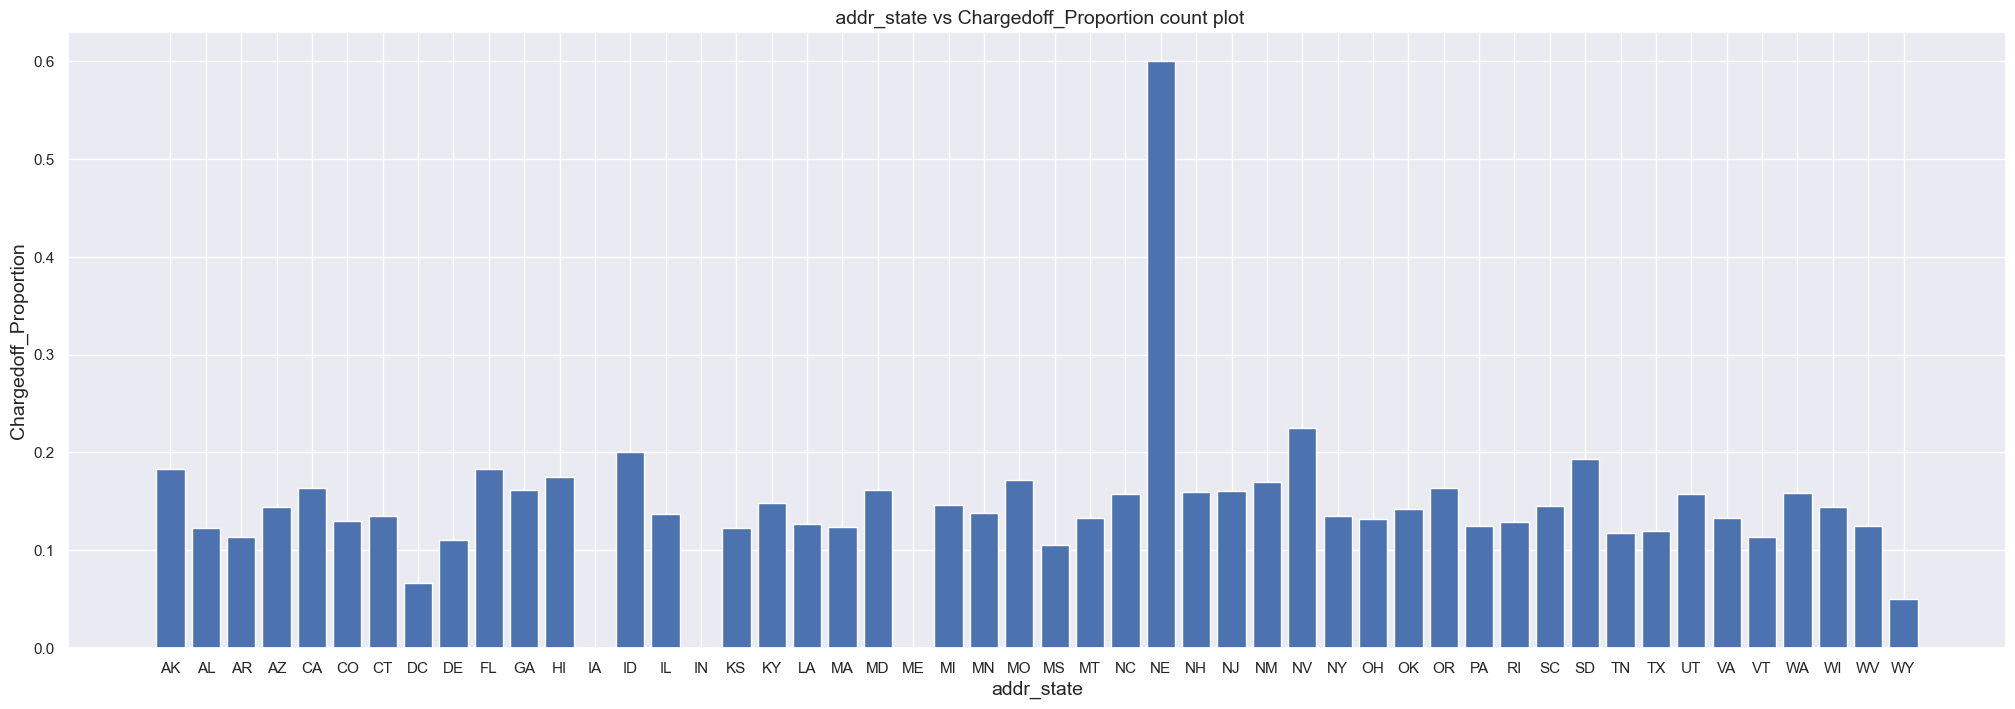

In [322]:
plt.figure(figsize=(25,8))
plt.bar(x=addr_state_vs_loan_status['addr_state'],height=addr_state_vs_loan_status['Chargedoff_Proportion'],data=addr_state_vs_loan_status)
plt.title(' addr_state vs Chargedoff_Proportion count plot',fontsize=14)
plt.xlabel('addr_state',fontsize=14)
plt.ylabel('Chargedoff_Proportion',fontsize=14)
plt.grid(True)
plt.show()

#### Insights 

1. Boroworrs which one taking loan coming from NE state have 60% of chances charged_off

2.  Boroworrs which one taking loan coming from IA IN and ME have low rsik of charged_off

# Multivariate Analysis

In [187]:
#finding correlation matrix
loan_correlation = main_csv.corr()
loan_correlation

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
loan_amnt        1.000000   0.981941     0.936939         0.291162   
funded_amnt      0.981941   1.000000     0.954867         0.296156   
funded_amnt_inv  0.936939   0.954867     1.000000         0.288726   
int_rate         0.291162   0.296156     0.288726         1.000000   
installment      0.931477   0.957111     0.902656         0.269168   
emp_length       0.150873   0.150528     0.161846        -0.002402   
annual_inc       0.403353   0.399187     0.382565         0.054062   
dti              0.090328   0.089525     0.097051         0.111660   
month            0.049998   0.039834     0.066320         0.025052   
year             0.105049   0.116207     0.249608         0.034651   

                 installment  emp_length  annual_inc       dti     month  \
loan_amnt        0.931477     0.150873    0.403353    0.090328  0.049998   
funded_amnt      0.957111     0.150528    0.399187    0.089525  0.039834   
funded_amnt_inv  0.902656     0.161846    0.382565    0.097051  0.066320   
int_rate         0.269168    -0.002402    0.054062    0.111660  0.025052   
installment      1.000000     0.122189    0.398352    0.079409  0.027070   
emp_length       0.122189     1.000000    0.195701    0.058375  0.022293   
annual_inc       0.398352     0.195701    1.000000   -0.072721  0.013671   
dti              0.079409     0.058375   -0.072721    1.000000  0.016153   
month            0.027070     0.022293    0.013671    0.016153  1.000000   
year             0.047877     0.120569    0.039149    0.092838 -0.033842   

                     year  
loan_amnt        0.105049  
funded_amnt      0.116207  
funded_amnt_inv  0.249608  
int_rate         0.034651  
installment      0.047877  
emp_length       0.120569  
annual_inc       0.039149  
dti              0.092838  
month           -0.033842  
year             1.000000

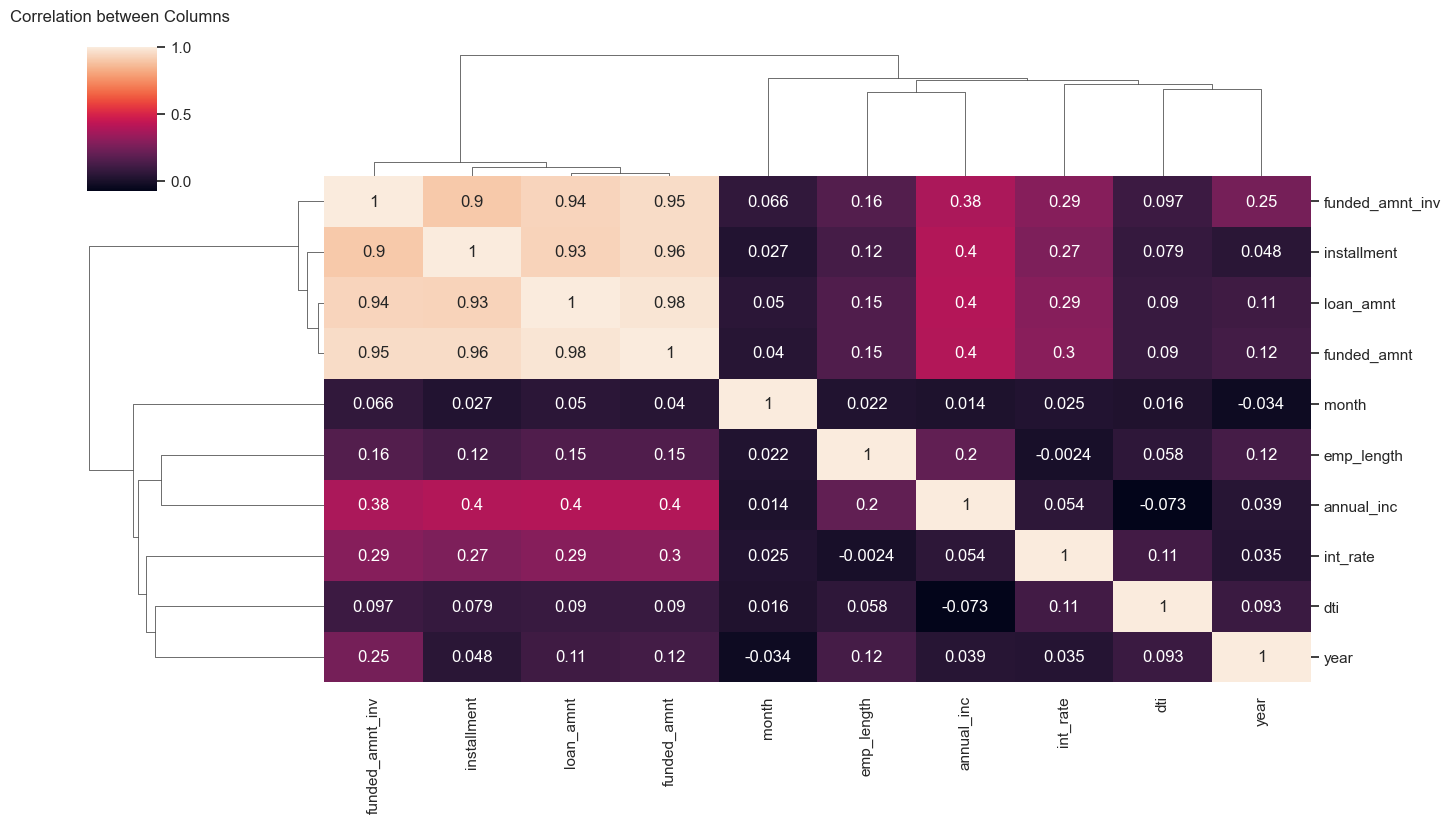

In [186]:

#plotting correaltion matrix on clustermap
sns.clustermap(loan_correlation,annot=True,figsize=(14, 8))
plt.title("Correlation between Columns \n")
plt.show()

#### Insights 

Loan amount funded_amt_inv installment fundend_amt are highly postive corelated and dti and annual_inc highly negative coreleated. 





# Suggestions

1) Lending club shuold consider to accepting more loans request less then 10% interest rate as their probabity of charged_off is have lesser.

2) Lending club shuold consider to accepting more loans request for borrowers which owning house their have lees probabilty to Charged_off.

3) Lending club shuold consider to accepting more loans request for grade A respect to B C D becuase in B C D E have lots off Charged_off

4) Lending club shuold consider to accepting more loans request of borrowers which have annual income gretaer then 90000 its charged_off % have nearest 10%.

5) Lending club need to accept more loan for 36 month term there have less chances of charged_off and it continuously increasing year by year.

6)  Lending club need to accept loan which owning house, annual income have greater then 90000, interest rate is less then 10%.This combination is have less chances to charged_off.

7) Lending club should accept more loan request of borrowers which one have source verified or verified. Their have less chance of charged_off.

8) Lending club should accept more loan request of borrowers which one have employment experienc less then 10 years.

9) Lending club should accept more loan for applied for wedding, major_purchase, car and credit_card here have chances of charged_off is less nearest 10% but for small business have 27.97% charged_off.

10) Lenading club should accept the loan request for small loan amount For loan amount till 14K charged_off(nearest 13%) have low risk 

11) Lenading club should accept the loan request for coming from addres state IN IA and ME here having low risk of charged off.